# Predicting Mortality in Acute Myocardial Infarction Patients: A Neural Network Approach

Esther(Qianyu) Xu

11-28-2023

<a name="top"></a>

## Table of Contents

- [1. Objective and Scope](#objective)

</n>

- [2. Assumptions/Hypotheses](#assumptions)

</n>

- [3. Dataset: Worcester Heart Attack Study (WHAS)](#dataset)

    - [3.1 Get the Data](#dataset-1)
    - [3.2 Analyze the Statistical Summary](#dataset-2)
    - [3.3 Create a Test Set](#dataset-3)

</n>
    
- [4. Data Exploration](#data)

    - [4.1 Univariate Variable Analysis](#data-1)
        - [4.1.1 Numerical Variables](#data-1-1)
        - [4.1.2 Categorical Variables](#data-1-2)
        
    - [4.2 Bivariate Variable Analysis](#data-2)
        - [4.2.1 Categorical vs Categorical](#data-2-1)
        - [4.2.2 Categorical vs Numerical](#data-2-2)
        - [4.2.3 Target Analysis - Numerical Variables](#data-2-3)
        - [4.2.4 Target Analysis - Categorical Variables](#data-2-4)

    - [4.3 Correlation Heatmap](#data-3)
    
</n>

- [5. Feature Engineering and Standardardization](#feature)

    - [5.1 Feature Engineering](#feature-1)
        - [5.1.1 Risk Factor Combinations - Comorbidity Index](#feature-1-1)
        - [5.1.2 Blood Pressure Ratios](#feature-1-2)
        - [5.1.3 Pulse Pressure](#feature-1-3)
        - [5.1.4 Age Group](#feature-1-4)
        - [5.1.5 Age-Related Risk Factors](#feature-1-5)
        - [5.1.6 Length of Follow-up](#feature-1-6)
        - [5.1.7 Mean Arterial Pressure (MAP)](#feature-1-7)
        - [5.1.8 BMI Categories](#feature-1-8)

    - [5.2 Standardization](#feature-2)
    
</n>


- [6. Modeling Techniques: Balancing Fit and Complexity](#modeling)

    - [6.1 Basic Feedforward Neural Network](#modeling-1)
    - [6.2 Convolutional Neural Network (CNN)](#modeling-2)
    - [6.3 Recurrent Neural Network (RNN) - LSTM](#modeling-3)
    - [6.4 Ensemble Methods](#modeling-4)
    - [6.5 Hyperparameter Tuning Strategies](#modeling-5)
        - [6.5.1 For Neural Networks](#modeling-5-1)
            - [6.5.1.1 Basic Feedforward Neural Network](#modeling-5-1-1)
            - [6.5.1.2 Convolutional Neural Network (CNN)](#modeling-5-1-2)
            - [6.5.1.3 Recurrent Neural Network (RNN) - LSTM](#modeling-5-1-3)
        - [6.5.2 For Ensemble Methods](#modeling-5-2)   
            - [6.5.2.1 Logistic Regression](#modeling-5-2-1)
            - [6.5.2.2 Gradient Boosting Classifier](#modeling-5-2-2)
            - [6.5.2.3 Ensemble Model](#modeling-5-2-3)
    - [6.6 Cross-Validation Strategies](#modeling-6)
        - [6.6.1 For Neural Networks](#modeling-6-1)
            - [6.6.1.1 Basic Feedforward Neural Network](#modeling-6-1-1)
            - [6.6.1.2 Convolutional Neural Network (CNN)](#modeling-6-1-2)
            - [6.6.1.3 Recurrent Neural Network (RNN) - LSTM](#modeling-6-1-3)
        - [6.6.2 For Ensemble Methods](#modeling-6-2)   
    - [6.7 Model Performance Evaluation: Accuracy and Methodological Insights](#modeling-7)
    
</n>

- [7. Limitations and Challenges](#limitations)    

</n>

- [8. Future Directions and Expansions](#future)   

<a name="objective"></a>

## 1. Objective and Scope

[Back to Top](#top)
    
The Worcester Heart Attack Study (WHAS) dataset, encompassing data from 1975 to 2005 for 500 acute myocardial infarction (AMI) patients, offers an unparalleled opportunity for delving into and forecasting health outcomes in cardiology. **This research is committed to constructing and juxtaposing a variety of neural networks—ranging from basic feedforward networks to sophisticated Convolutional Neural Networks (CNNs), Recurrent Neural Networks (RNNs), and ensemble methods—to predict mortality among AMI patients accurately.**

Selected for their adeptness in deciphering intricate patterns within health-related data, these models promise to yield deep insights into pivotal factors affecting patient survival and risk assessment, such as age, Body Mass Index (BMI), blood pressure, and heart rate. 

**The foremost ambition of this study is to develop a comprehensive predictive framework. This framework is not merely for assessing and contrasting the capabilities of these neural network models; it is also designed to bolster clinical decision-making, elevate the standard of patient care, and enrich the collective comprehension of mortality determinants in AMI patients.** In pursuing these goals, we remain firmly committed to upholding the highest ethical standards, ensuring the utmost respect for patient confidentiality, and aspiring to lay the groundwork for enhanced medical interventions and healthcare strategies in heart health.

<a name="assumptions"></a>

## 2. Assumptions/Hypotheses

[Back to Top](#top)

**Influence of Health Attributes on Mortality**: We posit that critical health-related attributes within the WHAS dataset, notably `age,` `BMI,` `blood pressure,` and `heart rate,` play a significant role in determining the mortality outcomes of AMI patients.

**Effectiveness of Neural Networks in Prediction**: This study operates under the assumption that neural networks, renowned for their ability to model intricate relationships, will be proficient in forecasting mortality outcomes from the dataset.

**Variability in Model Performance**: We anticipate that various neural network architectures will demonstrate different levels of predictive accuracy. This variability is expected to provide insights into how model complexity might correlate with a deeper understanding of data relationships.

**Superiority of Ensemble Methods**: We hypothesize that ensemble methods, which amalgamate multiple neural network models with traditional machine learning techniques, will outperform standalone models in performance and reliability.

**Critical Role of Hyperparameter Optimization**: We believe meticulous tuning of hyperparameters is essential for optimizing the effectiveness and precision of the neural network models.

**Efficiency of Temporal Data Modeling with RNNs**: It is anticipated that Recurrent Neural Networks (RNNs) and their variants, such as LSTM, will excel in modeling data that possess temporal or sequential traits.

**Progressive Understanding through Model Complexity**: Our hypothesis extends to the belief that initiating our research with simpler neural network models and progressively moving to more intricate architectures will unveil comprehensive insights. This approach sheds light on how different architectural choices influence model performance and applicability.

<a name="dataset"></a>

## 3. Dataset: Worcester Heart Attack Study (WHAS)

<a name="dataset-1"></a>

### 3.1 Get the Data

[Back to Top](#top)

The Worcester Heart Attack Study (WHAS) dataset is a robust data collection, encompassing **500 observations** and **16 distinct attributes**. Its composition is solely numerical and boolean-type data, and notably, it **contains no missing values**, significantly streamlining the preprocessing phase.

**Detailed Variable Descriptions:**

- `afb`: Atrial fibrillation, a heart rhythm disorder, is represented where '0' denotes absence and '1' indicates presence.

- `age`: This attribute records the patient's age in years.

- `av3`: Third-degree atrioventricular block, a severe heart block condition, is coded as '0' for absence and '1' for presence.

- `bmi`: Body Mass Index, calculated as weight in kilograms divided by height in meters squared, indicating body fat.

- `chf`: Congestive Heart Failure, a chronic condition impairing heart function, where '0' signifies no condition and '1' indicates its presence.

- `cvd`: Cardiovascular disease presence is denoted as '0' for no and '1' for yes.

- `diasbp`: Diastolic blood pressure, measuring the pressure in arteries between heartbeats.

- `gender`: Encoded as '0' for male and '1' for female.

- `hr`: Heart rate, the number of heartbeats per minute.

- `los`: Length of stay, indicating the duration of hospitalization in days.

- `miord`: MI Order, where '1' represents Recurrent and '0' signifies First heart attack.

- `mitype`: MI Type, categorized as '1' for Q-wave, '2' for Not Q-wave, and '3' for Indeterminate.

- `sho`: Cardiogenic shock, a severe complication, is marked '1' for yes and '0' for no.

- `sysbp`: Systolic blood pressure, the pressure in arteries during heartbeats.

- `fstat`: **Final status**, where 'True' indicates the occurrence of death, and 'False' implies otherwise.

- `lenfol`: Length of follow-up, the observational period post-discharge, measured in days.


In [56]:
#!pip install keras-tuner
#!pip install scikeras
#!pip install scikit-optimize
#!pip install optuna

# Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

sns.set_palette('Paired')

# ML Libraries
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, \
                                    Conv1D, MaxPooling1D, Flatten, LSTM, Reshape
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers.legacy import Adam
import keras_tuner as kt
from scikeras.wrappers import KerasClassifier
import optuna

# Increasing max rows, max columns, max column width
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 150)

In [2]:
whas_df = pd.read_csv("whas500.csv", index_col = 0)
whas_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   afb     500 non-null    int64  
 1   age     500 non-null    float64
 2   av3     500 non-null    int64  
 3   bmi     500 non-null    float64
 4   chf     500 non-null    int64  
 5   cvd     500 non-null    int64  
 6   diasbp  500 non-null    float64
 7   gender  500 non-null    int64  
 8   hr      500 non-null    float64
 9   los     500 non-null    float64
 10  miord   500 non-null    int64  
 11  mitype  500 non-null    int64  
 12  sho     500 non-null    int64  
 13  sysbp   500 non-null    float64
 14  fstat   500 non-null    bool   
 15  lenfol  500 non-null    float64
dtypes: bool(1), float64(7), int64(8)
memory usage: 63.0 KB


In [3]:
whas_df.head()

,afb,age,av3,bmi,chf,cvd,diasbp,gender,hr,los,miord,mitype,sho,sysbp,fstat,lenfol
0,1,83.0,0,25.54051,0,1,78.0,0,89.0,5.0,1,0,0,152.0,False,2178.0
1,0,49.0,0,24.02398,0,1,60.0,0,84.0,5.0,0,1,0,120.0,False,2172.0
2,0,70.0,0,22.14290,0,0,88.0,1,83.0,5.0,0,1,0,147.0,False,2190.0
3,0,70.0,0,26.63187,1,1,76.0,0,65.0,10.0,0,1,0,123.0,True,297.0
4,0,70.0,0,24.41255,0,1,85.0,0,63.0,6.0,0,1,0,135.0,False,2131.0


<a name="dataset-2"></a>

### 3.2 Analyze the Statistical Summary

[Back to Top](#top)

In [4]:
whas_df.describe()

,afb,age,av3,bmi,chf,cvd,diasbp,gender,hr,los,miord,mitype,sho,sysbp,lenfol
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.156000,69.846000,0.02200,26.613780,0.310000,0.750000,78.266000,0.400000,87.018000,6.116000,0.342000,0.306000,0.044000,144.704000,882.436000
std,0.363219,14.491456,0.14683,5.405655,0.462956,0.433446,21.545293,0.490389,23.586231,4.714127,0.474855,0.461291,0.205301,32.294865,705.665133
min,0.000000,30.000000,0.00000,13.045460,0.000000,0.000000,6.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,57.000000,1.000000
25%,0.000000,59.000000,0.00000,23.223775,0.000000,0.750000,63.000000,0.000000,69.000000,3.000000,0.000000,0.000000,0.000000,123.000000,296.500000
50%,0.000000,72.000000,0.00000,25.945925,0.000000,1.000000,79.000000,0.000000,85.000000,5.000000,0.000000,0.000000,0.000000,141.500000,631.500000
75%,0.000000,82.000000,0.00000,29.391963,1.000000,1.000000,91.250000,1.000000,100.250000,7.000000,1.000000,1.000000,0.000000,164.000000,1363.500000
max,1.000000,104.000000,1.00000,44.838860,1.000000,1.000000,198.000000,1.000000,186.000000,47.000000,1.000000,1.000000,1.000000,244.000000,2358.000000


In [5]:
whas_df['fstat'].value_counts()

fstat
False    285
True     215
Name: count, dtype: int64

array([[<Axes: title={'center': 'afb'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'av3'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'chf'}>, <Axes: title={'center': 'cvd'}>,
        <Axes: title={'center': 'diasbp'}>,
        <Axes: title={'center': 'gender'}>],
       [<Axes: title={'center': 'hr'}>, <Axes: title={'center': 'los'}>,
        <Axes: title={'center': 'miord'}>,
        <Axes: title={'center': 'mitype'}>],
       [<Axes: title={'center': 'sho'}>,
        <Axes: title={'center': 'sysbp'}>,
        <Axes: title={'center': 'lenfol'}>, <Axes: >]], dtype=object)

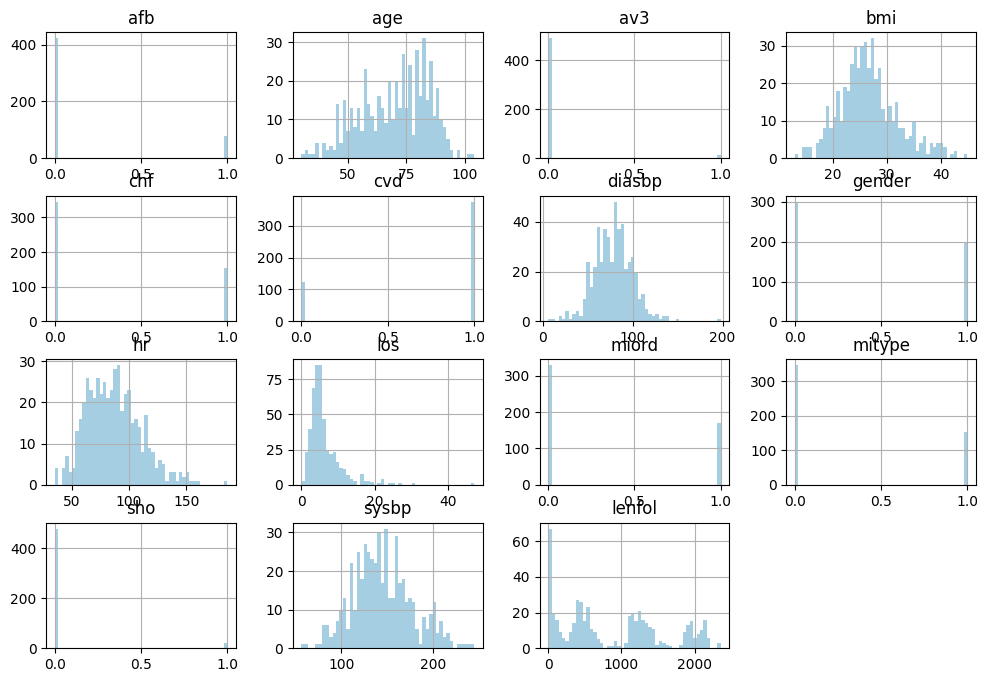

In [6]:
whas_df.hist(bins = 50, figsize = (12, 8))

The dataset comprehensively summarizes information from 500 patients, encapsulating various health-related attributes:

- **`AFB` (Atrial Fibrillation):** Observed in 15.6% of the patients, indicating a notable prevalence of this heart rhythm disorder.
- **`Age`:** The average age of patients is approximately 69.85 years, ranging from 30 to 104 years.
- **`AV3` (Third-Degree AV Block):** Affects 2.2% of patients, highlighting its occurrence among the sample.
- **`BMI` (Body Mass Index):** The mean BMI is 26.61, suggesting a moderate average body weight across the patient population.
- **`CHF` (Congestive Heart Failure):** Identified in 31% of patients, indicating a significant incidence of this condition.
- **`CVD` (Cardiovascular Disease):** Present in 75% of patients, reflecting a high prevalence of cardiovascular issues.
- **`DiasBP` (Diastolic Blood Pressure):** The average diastolic blood pressure is 78.27 mmHg.
- **`Gender`:** Females constitute 40% of the patient group.
- **`HR` (Heart Rate):** The average heart rate is 87.02 beats per minute.
- **`LOS` (Length of Stay in Hospital):** Patients, on average, stayed in the hospital for about 6.12 days.
- **`MIORD` (Myocardial Infarction Order):** 34.2% of patients had experienced prior myocardial infarctions.
- **`MITYPE` (Myocardial Infarction Type):** A specific type of myocardial infarction was present in 30.6% of cases.
- **`SHO` (Shock):** Shock complications were noted in 4.4% of patients.
- **`SysBP` (Systolic Blood Pressure):** The average systolic blood pressure is approximately 144.70 mmHg.
- **`LenFol` (Length of Follow-Up):** Follow-up duration averaged 882.44 days, ranging from 1 to 2358 days.
- **`Fstat` (Fatal Status):** Among the 500 patients, 215 (43%) experienced fatal outcomes, while 285 (57%) survived.

The dataset reveals significant variability across various metrics, indicative of a diverse patient demographic regarding age, health status, and treatment outcomes.


<a name="dataset-3"></a>

### 3.3 Create a Test Set

[Back to Top](#top)

In the division of the dataset into training and test sets, the **StratifiedShuffleSplit** method is utilized. This technique is particularly beneficial given the statistical diversity within our dataset, especially in critical factors such as `age,` `gender,` and various health-related attributes. By employing StratifiedShuffleSplit, we ensure that the training and test sets represent the overall dataset's demographics and characteristics.

This stratification is crucial to maintaining the integrity and balance of the data, which is vital for reliable model training and evaluation. It ensures that any patterns or insights derived from the models reflect the entire dataset rather than being skewed or biased by an unrepresentative sample. Additionally, this method aids in preserving the distribution of critical variables, such as different age groups and gender proportions, across both sets, thereby enhancing the robustness and generalizability of our predictive models.

In [7]:
target_col = "fstat"
categorical_cols = ["afb", "av3", "chf", "cvd", "gender", "miord", "mitype", "sho"]
numerical_cols = ["age", "bmi", "diasbp", "hr", "los", "sysbp", "lenfol"]

In [8]:
X = whas_df.drop(target_col, axis = 1)
y = whas_df[target_col]

sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

<a name="data"></a>

## 4. Data Exploration

[Back to Top](#top)

In [9]:
# For exploring data purpose
train_data = pd.concat([X_train, y_train], axis = 1) 

<a name="data-1"></a>

### 4.1 Univariate Variable Analysis

<a name="data-1-1"></a>

#### 4.1.1 Numerical Variables

[Back to Top](#top)

In [10]:
# Numeric variables
def plot_numeric_cols(df, numeric_cols):
    sns.set_style("whitegrid")
    palette = sns.color_palette("coolwarm", n_colors=len(numeric_cols))

    for idx, col in enumerate(numeric_cols):
        plt.figure(figsize=(10, 5))

        # Plotting the histogram with enhanced color palette
        ax = sns.histplot(df[col], kde=True, color=palette[idx])
        plt.title(f'Histogram for {col}', fontsize=18, fontweight='bold')
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

        # Getting summary statistics
        stats = df[col].describe()

        # Annotate statistics on the plot
        # Marking mean
        plt.axvline(stats['mean'], color='red', linestyle='--')
        plt.text(stats['mean'], ax.get_ylim()[1]*0.9, 'Mean: {:.2f}'.format(stats['mean']), rotation=0, color='red', fontsize=12)

        # Marking median
        plt.axvline(stats['50%'], color='blue', linestyle='--')
        plt.text(stats['50%'], ax.get_ylim()[1]*0.8, 'Median: {:.2f}'.format(stats['50%']), rotation=0, color='blue', fontsize=12)

        # Marking std
        plt.axvline(stats['mean'] + stats['std'], color='orange', linestyle='--')
        plt.axvline(stats['mean'] - stats['std'], color='orange', linestyle='--')
        plt.text(stats['mean'] + stats['std'], ax.get_ylim()[1]*0.7, 'Std: +{:.2f}'.format(stats['std']), rotation=0, color='orange', fontsize=12)
        plt.text(stats['mean'] - stats['std'], ax.get_ylim()[1]*0.7, 'Std: -{:.2f}'.format(stats['std']), rotation=0, color='orange', fontsize=12)

        # Marking 25%
        plt.axvline(stats['25%'], color='green', linestyle='--')
        plt.text(stats['25%'], ax.get_ylim()[1]*0.6, '25%: {:.2f}'.format(stats['25%']), rotation=0, color='green', fontsize=12)

        # Marking 75%
        plt.axvline(stats['75%'], color='purple', linestyle='--')
        plt.text(stats['75%'], ax.get_ylim()[1]*0.5, '75%: {:.2f}'.format(stats['75%']), rotation=0, color='purple', fontsize=12)

        # Marking min & max (placed at the bottom)
        plt.text(stats['min'], ax.get_ylim()[1]*0.05, 'Min: {:.2f}'.format(stats['min']), rotation=0, color='grey', fontsize=12)
        plt.text(stats['max'], ax.get_ylim()[1]*0.05, 'Max: {:.2f}'.format(stats['max']), rotation=0, color='grey', fontsize=12)

        plt.show()
        print("\n" + "="*100 + "\n")

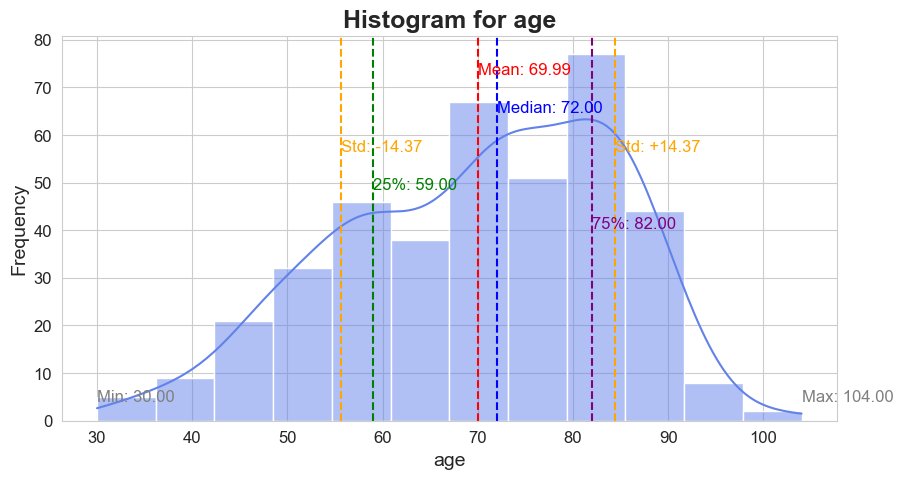

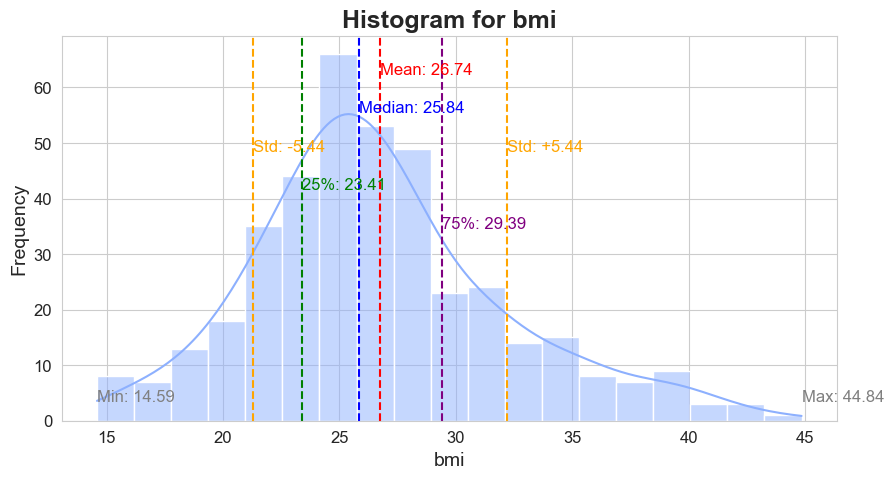

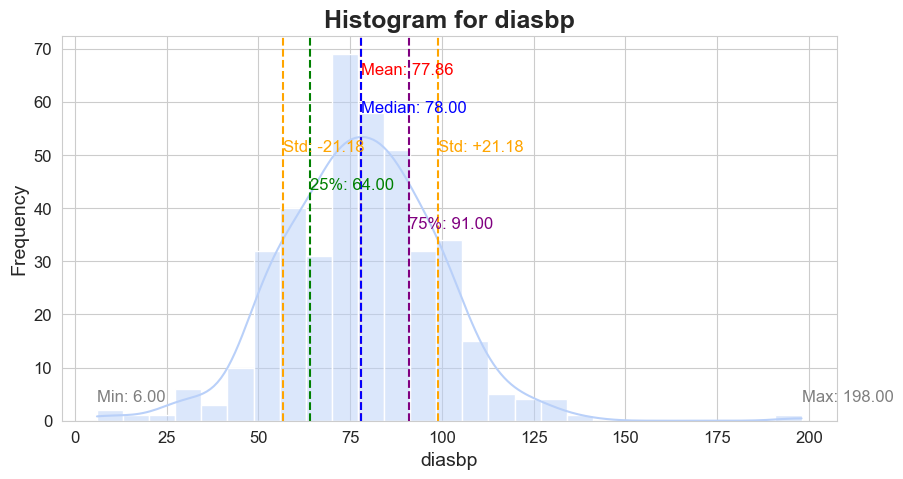

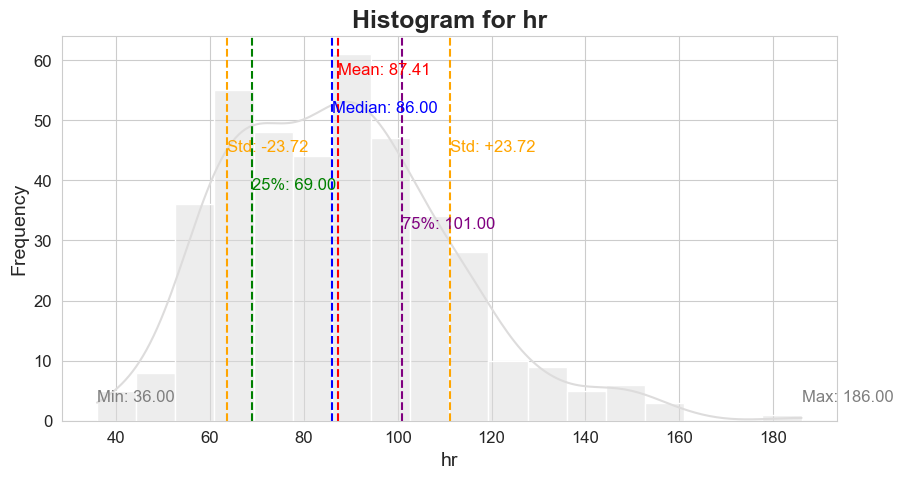

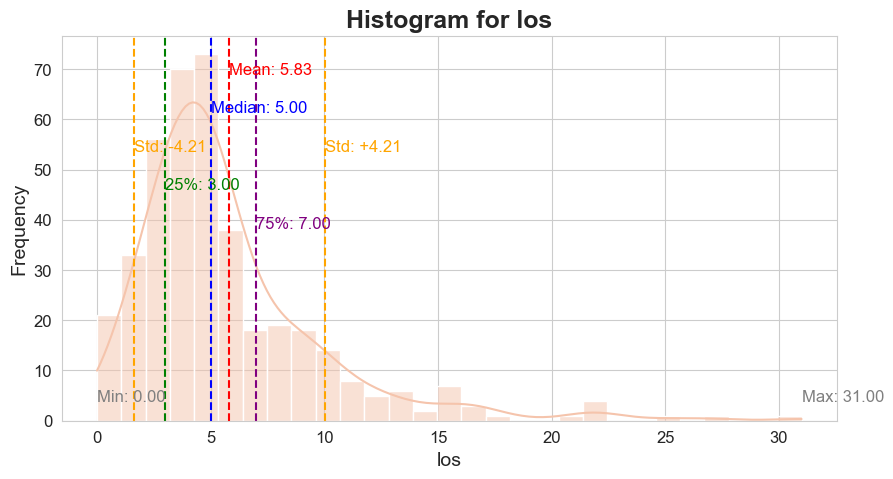

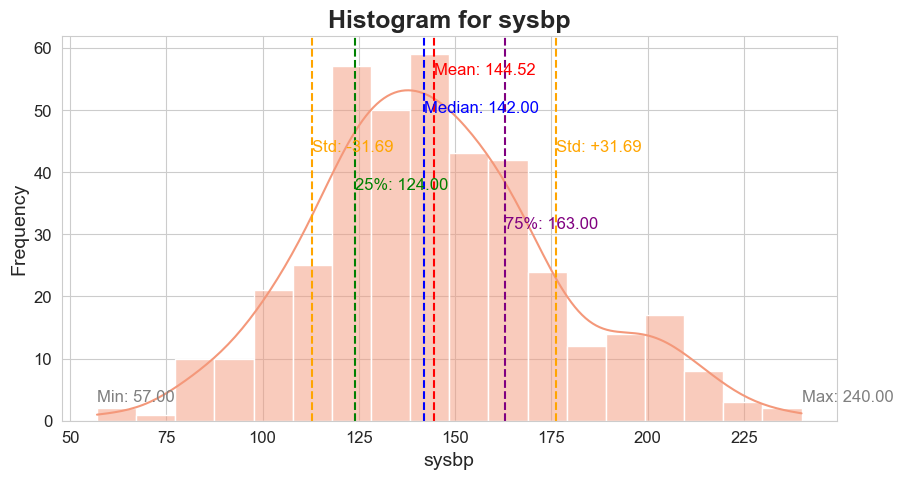

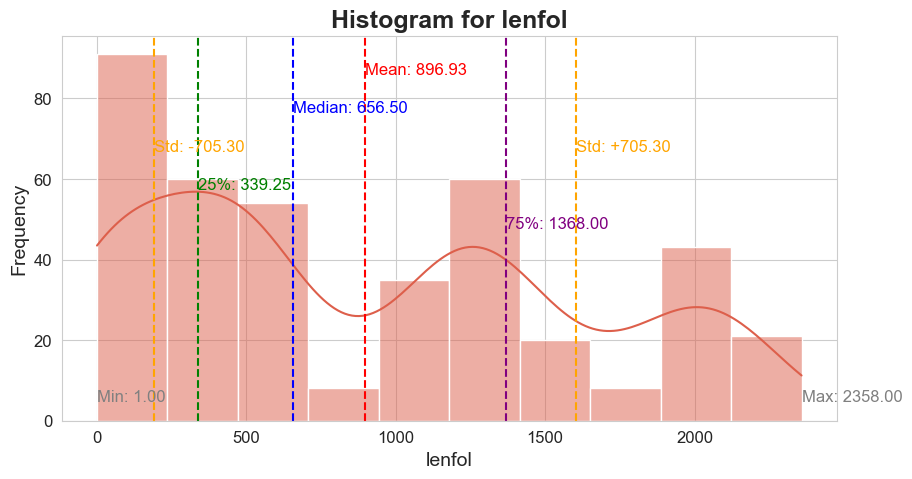

In [11]:
plot_numeric_cols(train_data, numerical_cols)

<a name="data-1-2"></a>

#### 4.1.2 Categorical Variables

[Back to Top](#top)

In [12]:
def plot_categorical_cols(df, categorical_cols):
    
    for col in categorical_cols:
        plt.figure(figsize=(15, 5))

        # 1. Bar Chart for Frequency Count
        plt.subplot(1, 3, 1)
        sns.countplot(data=df, x=col)
        plt.title(f'Frequency Count for {col}')
        plt.ylabel('Count')
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)

        # 2. Bar Chart for Percentage
        plt.subplot(1, 3, 2)
        sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts(normalize=True) * 100)
        plt.title(f'Percentage for {col}')
        plt.ylabel('Percentage (%)')
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.xticks(rotation=45)

        # 3. Pie Chart for Percentage Distribution
        plt.subplot(1, 3, 3)
        df[col].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=sns.color_palette())
        plt.title(f'Percentage Distribution for {col}')
        plt.ylabel('')

        # Display
        plt.tight_layout()
        plt.show()
        print("\n" + "="*100 + "\n")


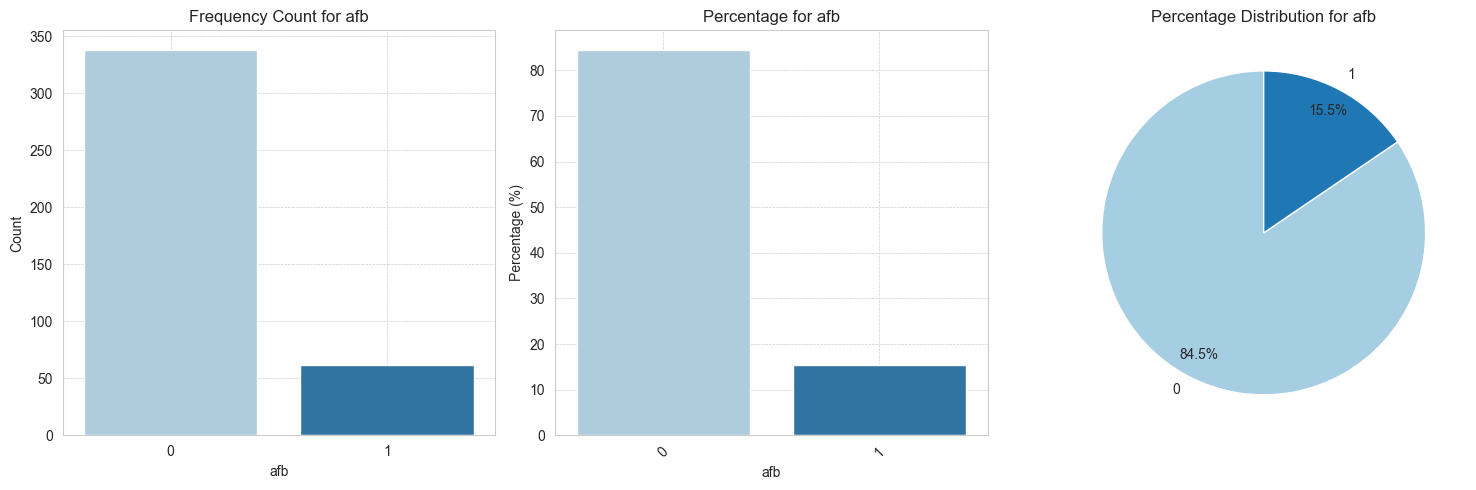

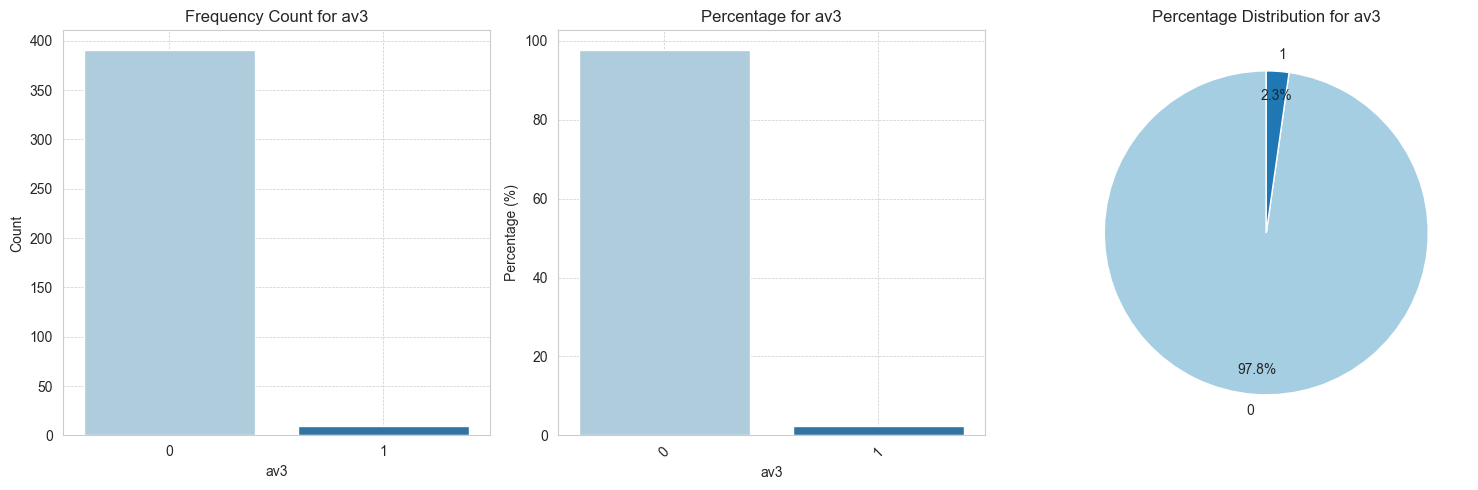

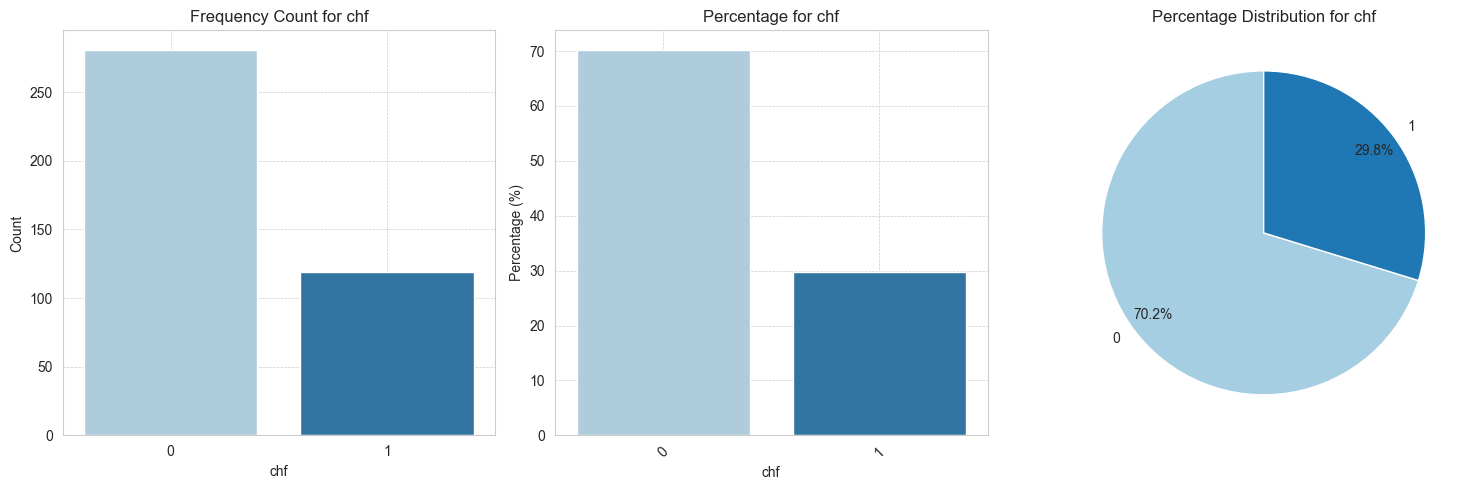

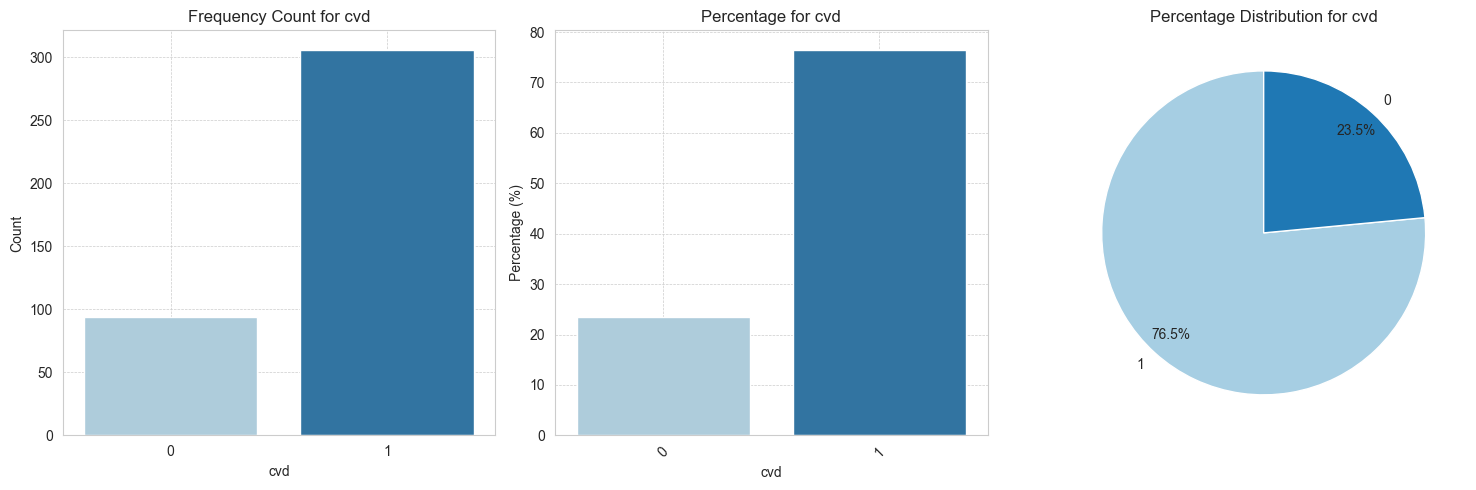

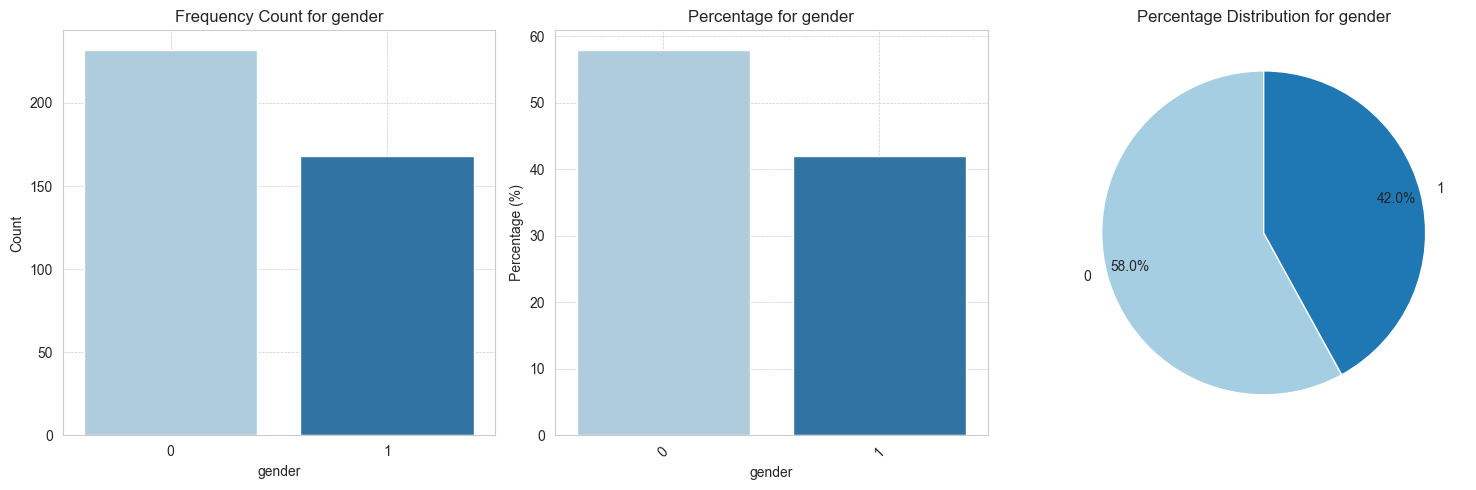

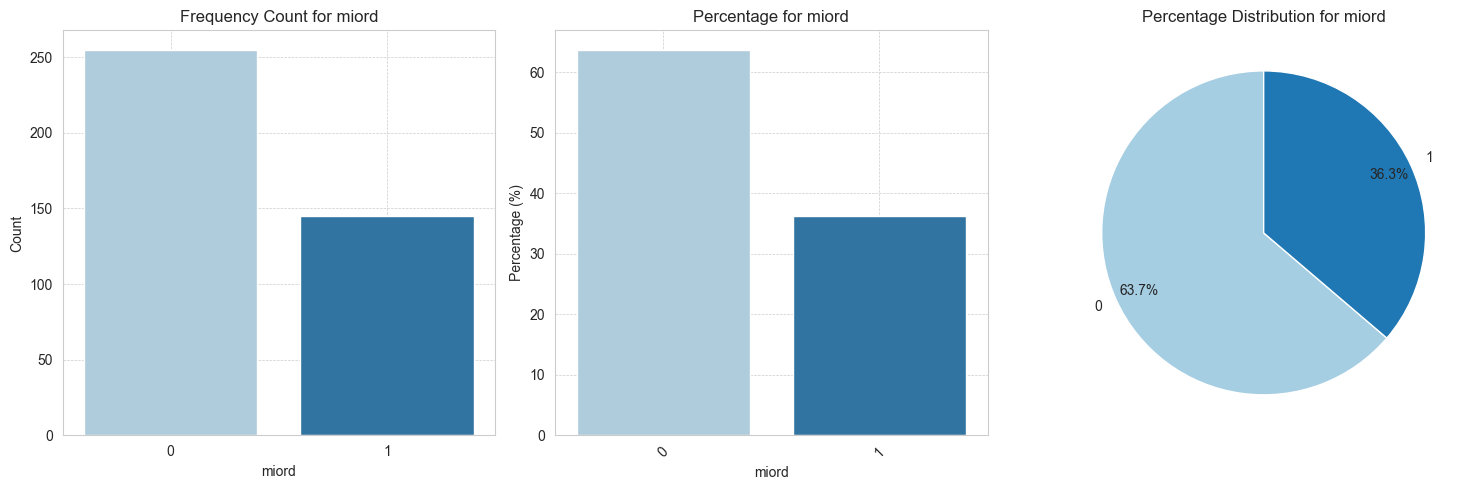

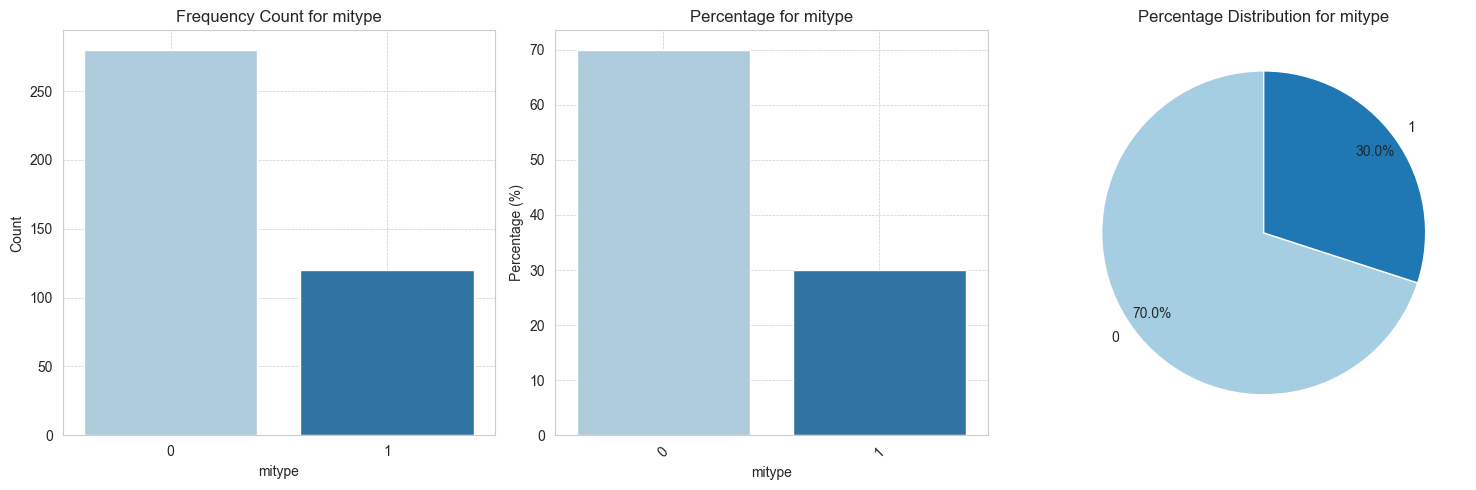

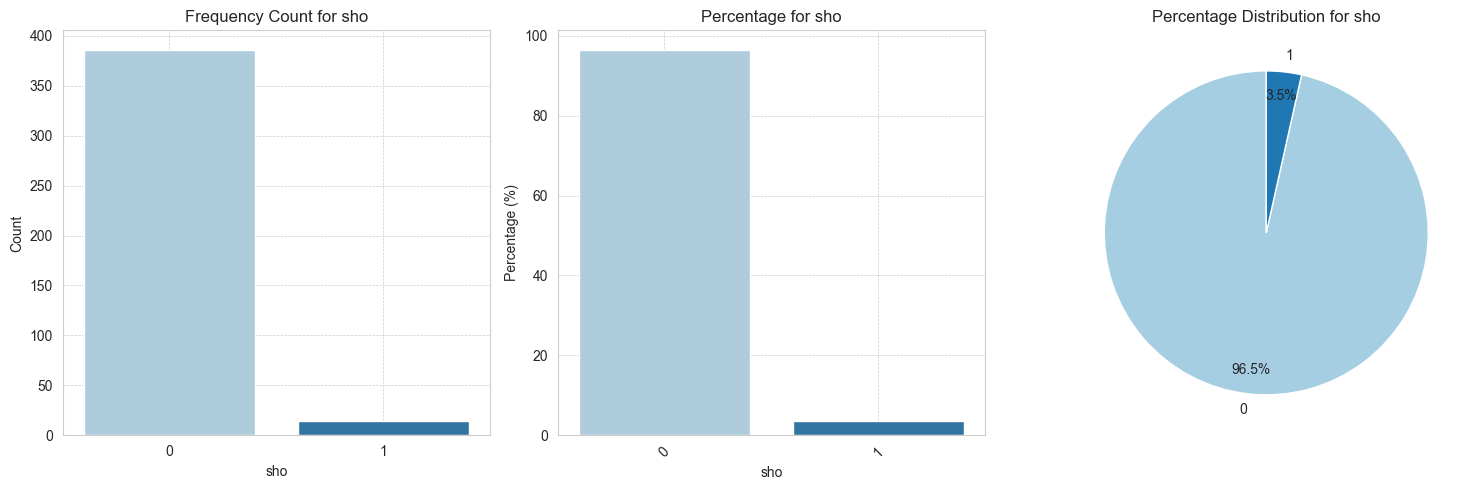

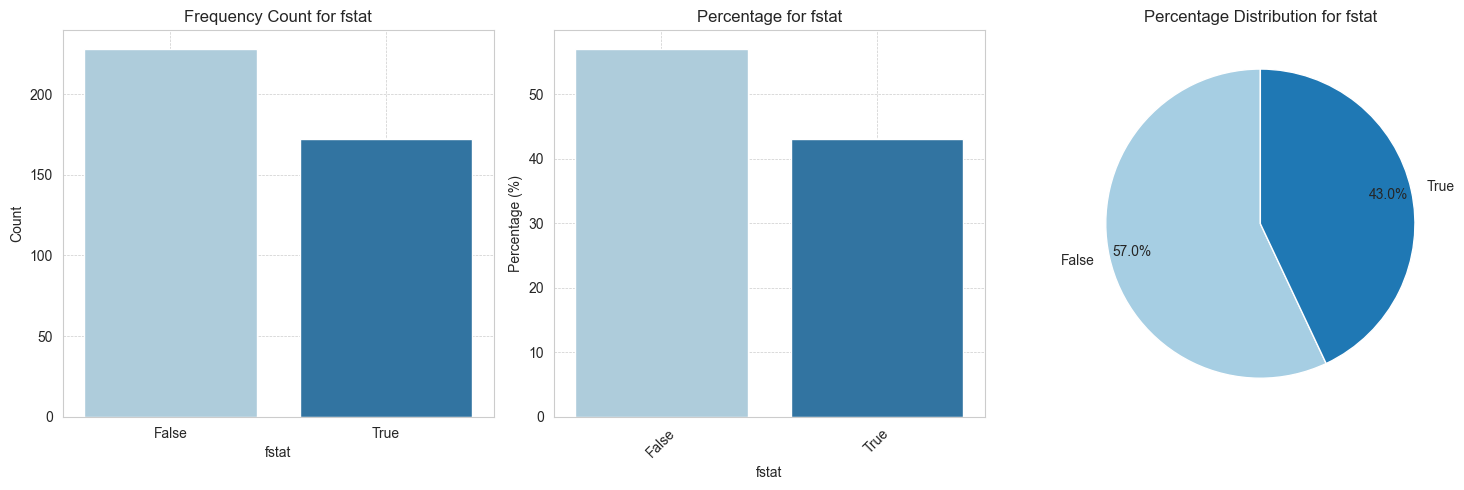

In [13]:
plot_categorical_cols(train_data, categorical_cols + [target_col])

<a name="data-2"></a>

### 4.2 Bivariate Variable Analysis

<a name="data-2-1"></a>

#### 4.2.1 Categorical vs Categorical

[Back to Top](#top)

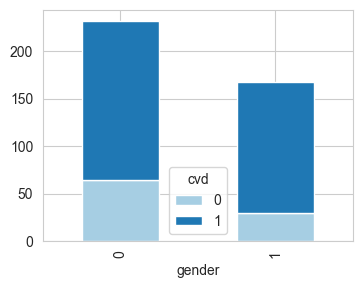

In [14]:
cross_tab = pd.crosstab(train_data['gender'], train_data['cvd'])

# Plot as a stacked bar chart
cross_tab.plot(kind='bar', stacked = True, figsize = (4, 3))
plt.show()

<a name="data-2-2"></a>

#### 4.2.2 Categorical vs Numerical

[Back to Top](#top)

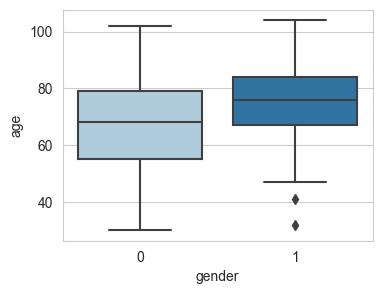

In [15]:
plt.figure(figsize=(4, 3))

sns.boxplot(data = train_data, x = 'gender', y = 'age')
plt.show()

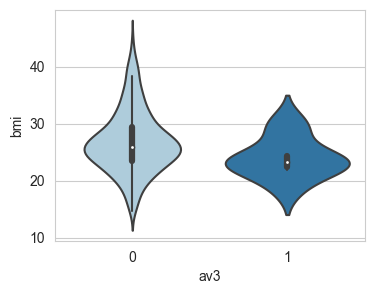

In [16]:
plt.figure(figsize=(4, 3))

sns.violinplot(data = train_data, x = 'av3', y = 'bmi')
plt.show()

<a name="data-2-3"></a>

#### 4.2.3 Target Analysis - Numerical Variables

[Back to Top](#top)

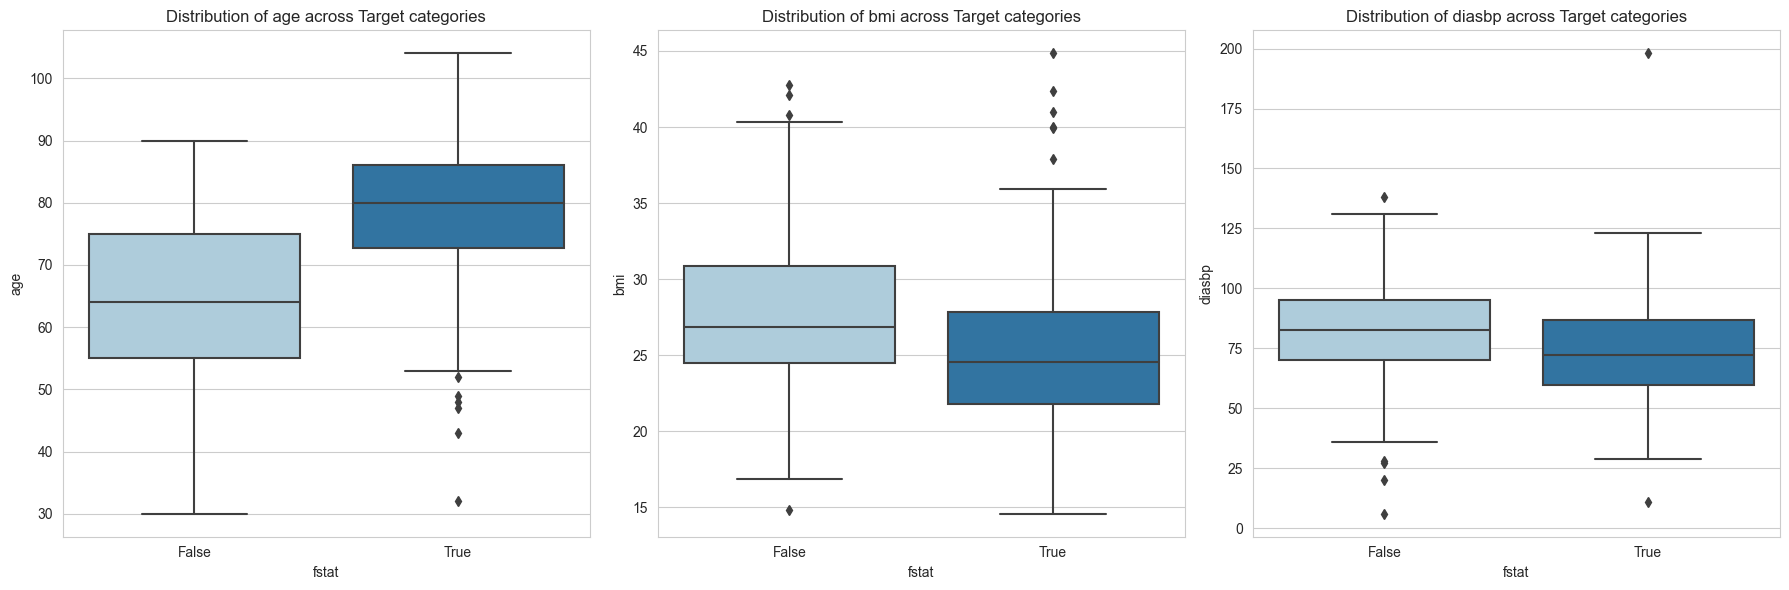

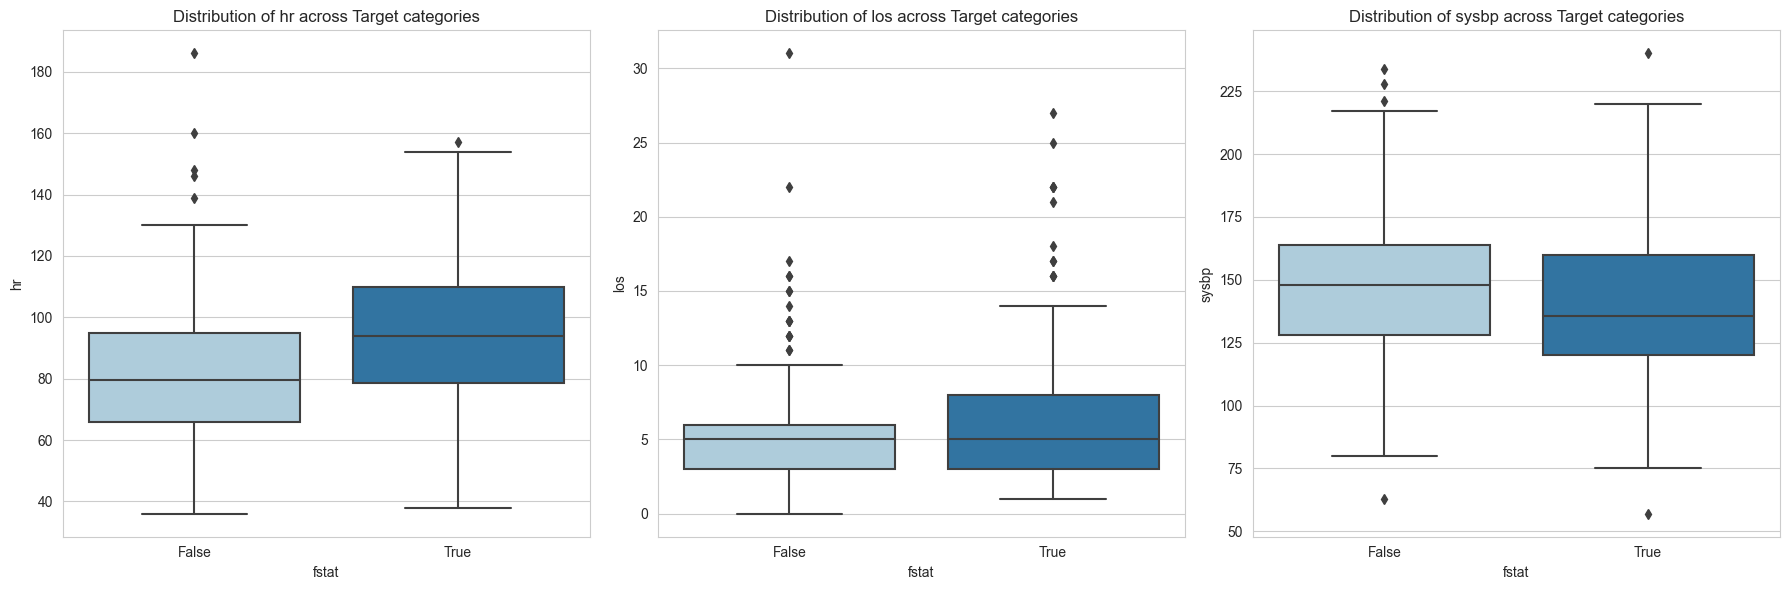

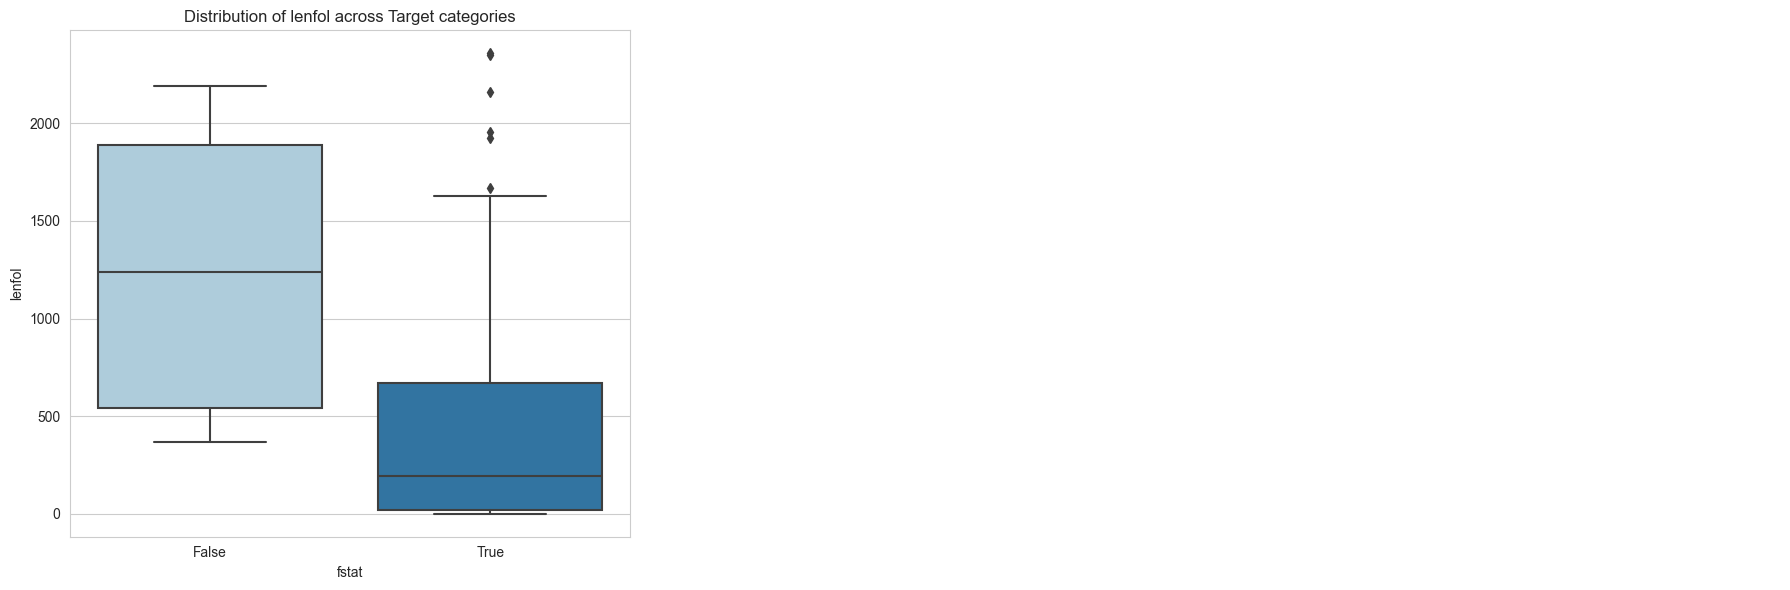

In [17]:
# Number of columns in each subplot row
n_cols = 3

for i, col in enumerate(numerical_cols):
    # Create a new figure with subplots for every 3 columns
    if i % n_cols == 0:
        fig, axes = plt.subplots(nrows = 1, ncols = n_cols, figsize = (18, 6))
        # Turn off all axes to begin with; we'll turn them back on when used
        for ax in axes:
            ax.axis('off')

    # Plot the boxplot on the correct subplot
    sns.boxplot(data = train_data, x = target_col, y=col, ax=axes[i % n_cols])
    axes[i % n_cols].set_title(f'Distribution of {col} across Target categories')
    axes[i % n_cols].axis('on')  # Turn the axis back on

    # Show the figure after every 3 columns or on the last column
    if (i+1) % n_cols == 0 or i == len(numerical_cols) - 1:
        plt.tight_layout()
        plt.show()

<a name="data-2-4"></a>

#### 4.2.4 Target Analysis - Categorical Variables

[Back to Top](#top)

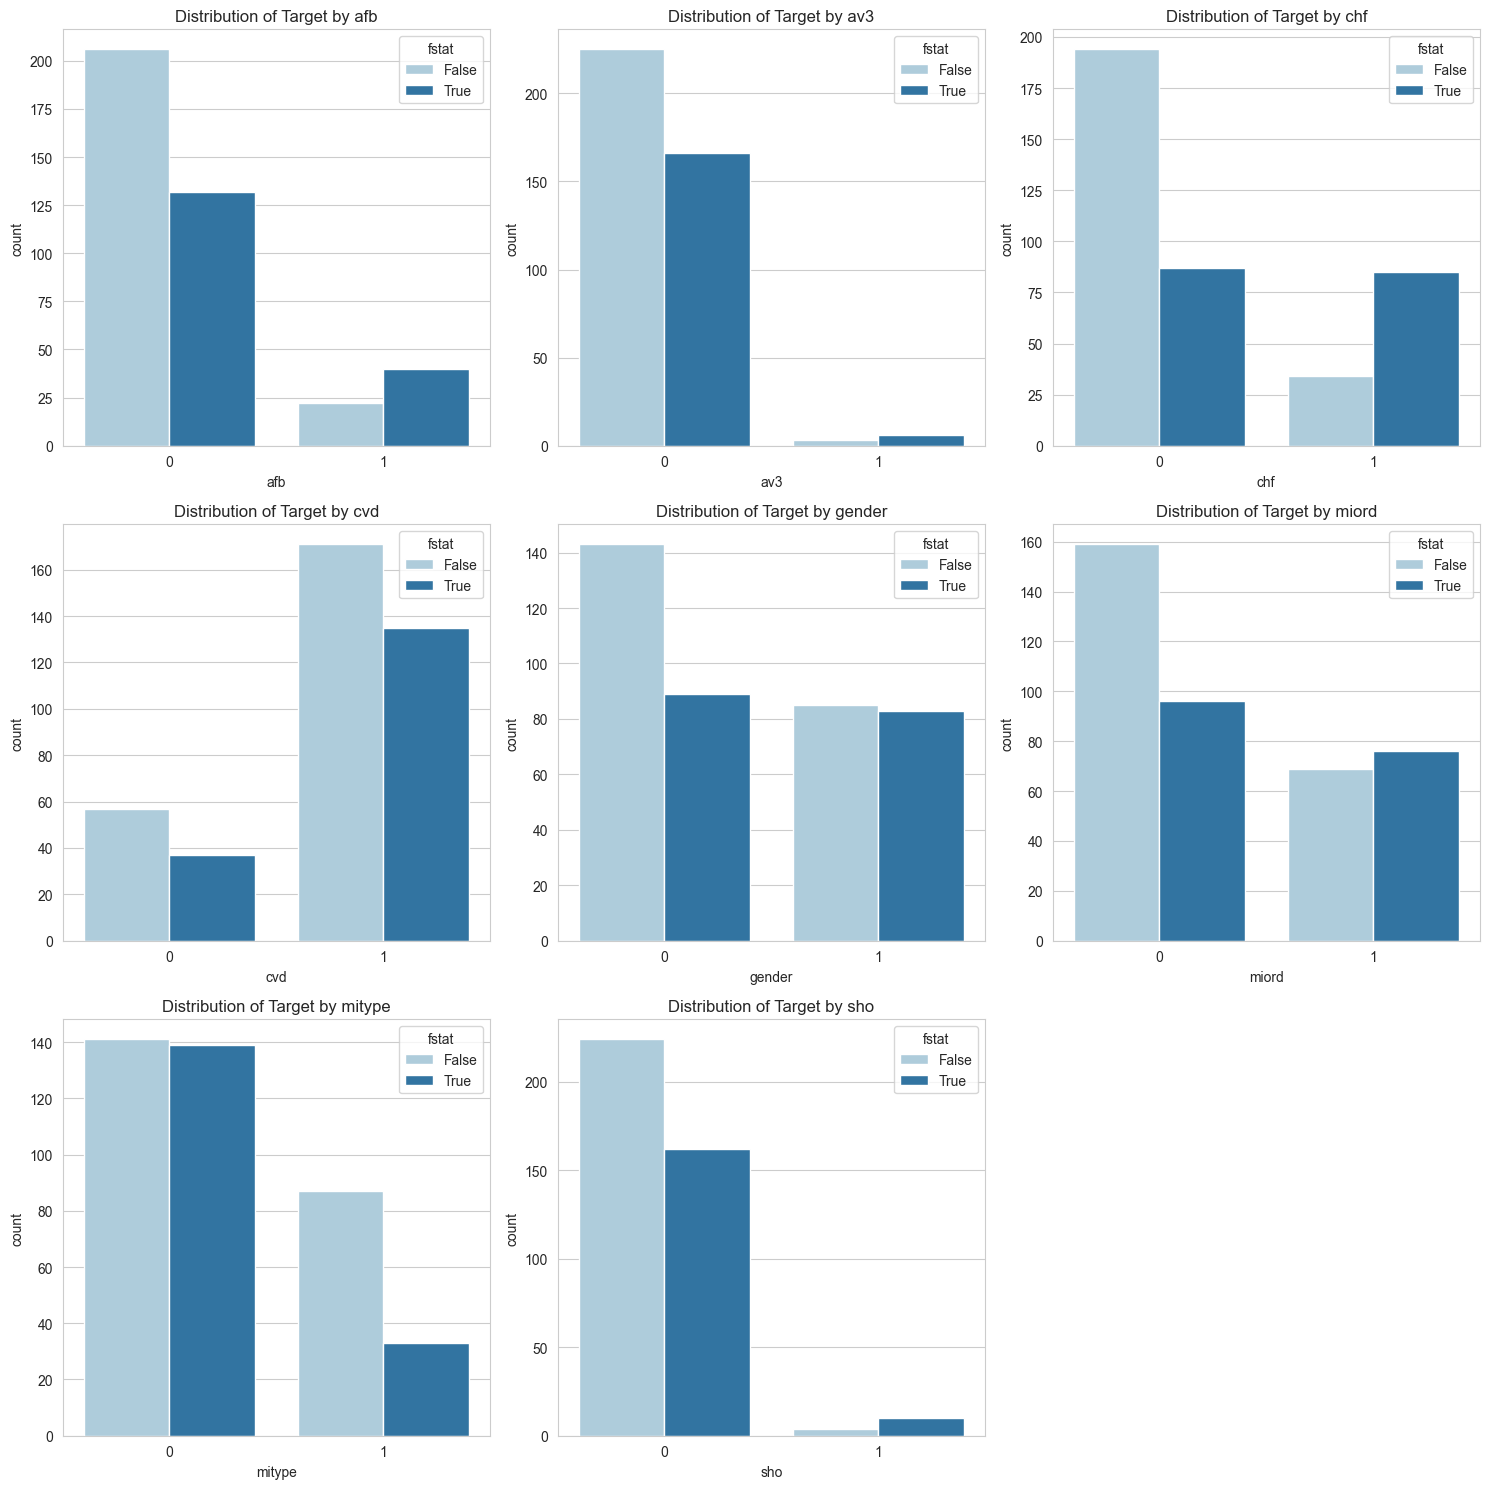

In [18]:
n_rows = -(-len(categorical_cols) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# If there's only one row (axes is 1D), make it 2D for consistent indexing
if n_rows == 1:
    axes = np.expand_dims(axes, axis=0)

# Go through the categorical columns and plot them
for idx, col in enumerate(categorical_cols):
    current_row, current_col = divmod(idx, n_cols)
    ax = axes[current_row, current_col]
    sns.countplot(x = col, hue = "fstat", data = train_data, ax = ax)
    ax.set_title(f'Distribution of Target by {col}')
    ax.legend(title = 'fstat')

# If the total number of plots isn't a multiple of n_cols, some subplots remain empty.
# We can turn these off for a cleaner look.
for empty_idx in range(len(categorical_cols), n_rows * n_cols):
    current_row, current_col = divmod(empty_idx, n_cols)
    axes[current_row, current_col].axis('off')

plt.tight_layout()
plt.show()

<a name="data-3"></a>

### 4.3 Correlation Heatmap

[Back to Top](#top)

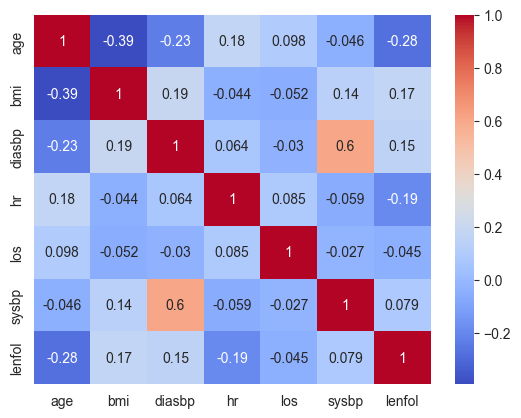

In [19]:
correlation_matrix = train_data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.show()

<a name="feature"></a>

## 5. Feature Engineering and Standardardization

<a name="feature-1"></a>

### 5.1 Feature Engineering

[Back to Top](#top)

In [20]:
X_train_modified = X_train.copy()
X_test_modified = X_test.copy()

<a name="feature-1-1"></a>

#### 5.1.1 Risk Factor Combinations - Comorbidity Index

[Back to Top](#top)

**Creating a Comprehensive Risk Profile:** In our pursuit to accurately assess patient risk, we introduce the development of a Comorbidity Index. This index is formulated by collating data on various health conditions such as `afb` (atrial fibrillation), `chf` (congestive heart failure), and `cvd` (cardiovascular disease). The aim is to enumerate each patient's comorbid conditions, thereby quantifying the cumulative health burden.

In addition, we intend to construct Specific Risk Scores. This involves leveraging insights from medical research to identify and integrate combinations of health factors that significantly increase the risk of certain conditions. By doing so, we can achieve a more nuanced understanding of individual patient health risks.

This approach allows for a multifaceted evaluation of health risks, going beyond singular data points to a more holistic view of patient health. It aligns to enhance the precision of our predictive models and deepen our understanding of the complex interplay of health factors in patient outcomes.

In [21]:
# For the training set
X_train_modified['comorbidity_index'] = X_train_modified[['afb', 'chf', 'cvd']].sum(axis=1)

# For the test set
X_test_modified['comorbidity_index']  = X_test_modified[['afb', 'chf', 'cvd']].sum(axis=1)


<a name="feature-1-2"></a>

#### 5.1.2 Blood Pressure Ratios

[Back to Top](#top)

In our continued effort to refine our feature set, we introduce the calculation of Blood Pressure Ratios. This metric is derived by dividing the systolic blood pressure by the diastolic blood pressure, mathematically represented as:

$\text{Blood Pressure Ratios} = \frac{\text{systolic blood pressure}}{\text{diastolic blood pressure}}$

The rationale behind this ratio is to capture a more comprehensive picture of a patient's cardiovascular health. While individual systolic and diastolic readings provide valuable information, their ratio can offer additional insights. For instance, a high ratio could indicate potential vascular stiffness or other cardiovascular risks not immediately apparent from the individual systolic or diastolic values alone.

This ratio will be incorporated into our predictive models, potentially enhancing their ability to identify nuanced patterns related to cardiovascular health and mortality risk in patients with acute myocardial infarction (AMI). By doing so, we aim to enrich our analytical framework with more informative and clinically relevant features.

In [22]:
# For the training set
X_train_modified['bp_ratio'] = X_train_modified['sysbp'] / X_train_modified['diasbp']

# For the test set
X_test_modified['bp_ratio'] = X_test_modified['sysbp'] / X_test_modified['diasbp']


<a name="feature-1-3"></a>

#### 5.1.3 Pulse Pressure

[Back to Top](#top)

**Pulse Pressure and Cardiovascular Health**: Pulse pressure, a vital measure in assessing cardiovascular health, is significant. An increase in pulse pressure is commonly associated with an elevated risk of heart disease, making it an essential indicator of cardiovascular health. The calculation of pulse pressure is straightforward, given by the formula:

$\text{Pulse Pressure} = \text{systolic blood pressure} - {\text{diastolic blood pressure}}$

In clinical settings, elevated pulse pressure is often associated with a higher risk of heart disease. A wider gap between systolic and diastolic pressure can indicate arterial stiffness and other cardiovascular anomalies. Given its significance, incorporating pulse pressure as a feature in our models could provide valuable insights into the cardiovascular status and associated risks in patients with acute myocardial infarction (AMI).

By analyzing pulse pressure in conjunction with other health metrics, we can unearth deeper correlations and patterns that might be missed when considering systolic and diastolic pressures independently. This approach aligns with our objective of developing a comprehensive and nuanced predictive framework for AMI patient outcomes, where each variable contributes to a holistic understanding of patient health.

In [23]:
# For the training set
X_train_modified['pulse_pressure'] = X_train_modified['sysbp'] - X_train_modified['diasbp']

# For the test set
X_test_modified['pulse_pressure'] = X_test_modified['sysbp'] - X_test_modified['diasbp']


<a name="feature-1-4"></a>

#### 5.1.4 Age Group

[Back to Top](#top)

**Categorizing Age to Enhance Predictive Analysis**: Age is a critical factor in the prognosis of acute myocardial infarction (AMI) and can significantly influence patient outcomes. To ensure our analysis aligns with established medical standards and literature, we categorize age into specific groups, each representing a distinct stage in the adult lifespan. These categories are as follows:

- **Young Adult**: Ages 18 to 35 years. This group represents the early adult years, typically associated with lower risk for AMI but important for identifying early-onset cases.

- **Middle-Aged Adult**: Ages 36 to 55 years. Often considered the age range with an increasing incidence of AMI, this category is crucial for studying the onset of heart-related issues.

- **Senior Adult**: Ages 56 to 75 years. This age group is particularly significant given the higher prevalence of AMI and related complications.

- **Elderly**: Ages over 75 years. The elderly category is vital for understanding AMI in the context of aging and associated comorbidities.

By segmenting the dataset into these age categories, we aim to uncover age-specific patterns and trends in AMI outcomes. This approach enables a more nuanced understanding of how age interacts with other health variables and impacts the effectiveness of different treatment approaches. This categorization will enhance the predictive power and clinical relevance of our models.

In [24]:
age_bins = [18, 35, 55, 75, np.inf]
age_labels = ['Young Adult', 'Middle-Aged Adult', 'Senior Adult', 'Elderly']

# For the training set
X_train_modified['age_group'] = pd.cut(X_train_modified['age'], 
                                       bins = age_bins, 
                                       labels = age_labels, 
                                       right = False)

# For the test set
X_test_modified['age_group'] = pd.cut(X_test_modified['age'], 
                                       bins = age_bins, 
                                       labels = age_labels, 
                                       right = False)

In [25]:
# Convert age_group into dummy variables
X_train_modified = pd.get_dummies(X_train_modified, columns = ['age_group'])
X_test_modified = pd.get_dummies(X_test_modified, columns = ['age_group'])

<a name="feature-1-5"></a>

#### 5.1.5 Age-Related Risk Factors

[Back to Top](#top)

**Exploring the Intersection of Age and Other Risk Factors**: In acute myocardial infarction (AMI) research, the impact of age on other risk factors cannot be overstated. Our analysis focuses on examining how age interacts with and potentially amplifies other risk factors. A prime example is exploring **the product of age and BMI (Body Mass Index)**.

This approach acknowledges that the influence of specific health metrics, like BMI, might not be uniform across all age groups. For instance, the same BMI value may have different implications for a young adult than a senior individual. By calculating and analyzing age-dependent interactions, such as multiplying age by BMI, we aim to uncover nuanced relationships that reflect how the risk associated with a factor like BMI can vary depending on the patient's age.

Such an analysis can provide vital insights into the dynamics of risk factors across different age groups. This understanding is crucial for developing age-sensitive predictive models and treatment strategies, ensuring they are tailored to the specific risk profiles of different age groups.

By integrating these age-related interactions into our predictive framework, we seek to enhance the accuracy and relevance of our models, offering a more comprehensive and personalized approach to predicting outcomes in AMI patients.

In [26]:
# For the training set
X_train_modified['age_bmi'] = X_train_modified['age'] * X_train_modified['bmi']

# For the test set
X_test_modified['age_bmi'] = X_test_modified['age'] * X_test_modified['bmi']


<a name="feature-1-6"></a>

#### 5.1.6 Length of Follow-up

[Back to Top](#top)

**Segmenting Follow-up Duration for In-depth Analysis**: The `lenfol` variable, denoting the length of follow-up in our dataset, is a pivotal feature for assessing long-term patient outcomes post-acute myocardial infarction (AMI). Recognizing the varying implications of different follow-up durations, we propose categorizing this variable into distinct time frames. This categorization includes:

- **Short-term (0-6 months)**: This period is crucial for understanding immediate post-treatment outcomes and early recovery phases.

- **Mid-term (6-12 months)**: This timeframe helps in evaluating the stability of the patient's condition and the effectiveness of short-term treatments.

- **Long-term (1-2 years)**: Observations during this period can offer insights into the sustained impact of treatment and the progression of AMI.

- **Extended-term (over two years)**: This category is essential for studying long-term health trends and the potential for recurrent events or late complications.

We aim to conduct a more granular analysis of patient outcomes by stratifying the follow-up duration into these segments. This approach will enable us to identify patterns and trends specific to each follow-up period, providing a more comprehensive understanding of the recovery trajectory and long-term health implications for AMI patients.

Furthermore, this segmentation facilitates a more targeted analysis of the effectiveness of various treatments and interventions over different periods, which is crucial for improving patient care and formulating tailored follow-up strategies.

In [27]:
lenfol_bins = [0, 180, 365, 730, np.inf]  # days: 0-6 months, 6-12 months, 1-2 years, 2+ years
lenfol_labels = ['0-6 months', '6-12 months', '1-2 years', '2+ years']

# For the training set
X_train_modified['lenfol_category'] = pd.cut(X_train_modified['lenfol'], 
                                       bins = lenfol_bins, 
                                       labels = lenfol_labels, 
                                       right = False)

# For the test set
X_test_modified['lenfol_category'] = pd.cut(X_test_modified['lenfol'], 
                                       bins = lenfol_bins, 
                                       labels = lenfol_labels, 
                                       right = False)

In [28]:
# Convert lenfol_category into dummy variables
X_train_modified = pd.get_dummies(X_train_modified, columns = ['lenfol_category'])
X_test_modified = pd.get_dummies(X_test_modified, columns = ['lenfol_category'])

<a name="feature-1-7"></a>

#### 5.1.7 Mean Arterial Pressure (MAP)

[Back to Top](#top)

**Assessing Cardiovascular Health with MAP**: The Mean Arterial Pressure (MAP) is an invaluable cardiovascular health metric offering a comprehensive view of blood pressure throughout a cardiac cycle. Distinguished from mere systolic or diastolic measurements, MAP provides a more holistic insight into the average pressure exerted on arteries, essential for assessing organ perfusion and overall cardiovascular health.

The calculation of MAP is based on both systolic and diastolic blood pressures, using the formula:

$\text{MAP} = diasbp+ \frac{1}{3}(sysbp−diasbp) \\  
\  \  \  \  \ = \frac{1}{3} \times \text{Systolic Blood Pressure} + \frac{2}{3} \times \text{Diastolic Blood Pressure}$ 

This formula effectively combines the systolic and diastolic pressures, reflecting the continuous pressure experienced by the arteries during the cardiac cycle. By incorporating MAP into our predictive models, we can better understand how blood pressure dynamics relate to the risk of adverse outcomes in patients with acute myocardial infarction (AMI).

Given that MAP is a better indicator of vital organ perfusion than systolic pressure alone, its inclusion is expected to significantly enhance our models' predictive accuracy and clinical relevance, particularly in assessing the risk of cardiovascular events and complications in AMI patients.


In [29]:
# For the training set
X_train_modified['MAP'] = (1/3) * X_train_modified['sysbp'] + (2/3) * X_train_modified['diasbp']

# For the test set
X_test_modified['MAP'] = (1/3) * X_test_modified['sysbp'] + (2/3) * X_test_modified['diasbp']

<a name="feature-1-8"></a>

#### 5.1.8 BMI Categories

[Back to Top](#top)

**Stratifying BMI for Enhanced Analysis**: Body Mass Index (BMI) is widely used to categorize individuals based on body fat, which can significantly affect cardiovascular health. In our study, we plan to categorize BMI into distinct groups per standard medical guidelines. This stratification allows for a more nuanced analysis of the relationship between body weight and acute myocardial infarction (AMI) outcomes. The proposed categories are:

- **Underweight**: BMI less than 18.5. This category helps identify individuals who may have health risks associated with underweight.

- **Normal Weight**: BMI between 18.5 and 24.9. Considering the healthy weight range, this group is a reference point for comparing other categories.

- **Overweight**: BMI between 25 and 29.9. This category often indicates increased cardiovascular risk, making it crucial for our analysis.

- **Obesity**: BMI of 30 or higher. Divided further into three subcategories - Class I (BMI 30-34.9), Class II (BMI 35-39.9), and Class III (BMI 40 or higher) - this group is of particular interest due to the high risk of health complications associated with obesity.

By categorizing BMI in this manner, we aim to determine how body weight categories correlate with the prognosis and outcomes of AMI. This approach will enable us to identify specific patterns and trends related to different BMI categories, thereby contributing to a more tailored and effective treatment strategy for patients based on their BMI classification.

In [30]:
bmi_bins = [0, 18.5, 25, 30, np.inf]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

# For the training set
X_train_modified['bmi_category'] = pd.cut(X_train_modified['bmi'], 
                                          bins = bmi_bins, 
                                          labels = bmi_labels)

# For the test set
X_test_modified['bmi_category'] = pd.cut(X_test_modified['bmi'], 
                                         bins = bmi_bins, 
                                         labels = bmi_labels)


In [31]:
# Convert bmi_category into dummy variables
X_train_modified = pd.get_dummies(X_train_modified, columns = ['bmi_category'])
X_test_modified = pd.get_dummies(X_test_modified, columns = ['bmi_category'])

<a name="feature-2"></a>

### 5.2 Standardization

[Back to Top](#top)


**Ensuring Uniformity and Comparability in Data**: Standardization is crucial in preparing our dataset for effective neural network modeling. This process involves scaling the features to have a mean of 0 and a standard deviation of 1. The primary purpose of standardizing data in our context is to neutralize the effect of widely varying scales in different variables, ensuring that each feature contributes proportionately to the predictive models.

The critical steps in our standardization process include:

- **Calculating Mean and Standard Deviation**: We compute the mean and standard deviation for each numerical feature in the dataset.

- **Rescaling the Data**: Each value is then transformed using the formula \((x - \text{mean}) / \text{standard deviation}\), where \(x\) is the original value.

- **Applying Standardization to Training and Test Sets**: The same standardization parameters (mean and standard deviation) used on the training set must also be applied to the test set to maintain consistency in data interpretation.

Standardization is essential for our neural network models, as it can significantly impact their learning process. Large-scale features can disproportionately influence the model's learning, leading to suboptimal performance. By standardizing, we ensure a level playing field for all features, allowing the model to learn more effectively from the underlying patterns in the data.

In [32]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_modified)
X_test_scaled = scaler.transform(X_test_modified)

<a name="modeling"></a>

## 6. Modeling Techniques: Balancing Fit and Complexity

[Back to Top](#top)


<a name="modeling-1"></a>

### 6.1 Basic Feedforward Neural Network

[Back to Top](#top)

**Implementing the Foundations of Neural Network Modeling**: The Basic Feedforward Neural Network (FFNN) represents our initial foray into neural network modeling for predicting outcomes in acute myocardial infarction (AMI) patients. This type of neural network is characterized by its simplicity and straightforward structure, where information moves in only one direction—from input nodes, through hidden layers, to output nodes—without any cycles or loops.

Critical aspects of our Basic FFNN approach include:

- **Architecture**: Our FFNN comprises an input layer, one hidden layers, and an output layer. The input layer is designed to receive various standardized features from our dataset, while the hidden layers will process these inputs through a series of weighted connections. The output layer will produce the final prediction regarding AMI patient outcomes.
  
- **Activation Functions**: We plan to use suitable activation functions like ReLU (Rectified Linear Unit) for hidden layers to introduce non-linearity, enabling the model to capture complex patterns in the data.

- **Loss Function and Optimization**: For training the network, we will employ a loss function appropriate for our prediction task (such as binary cross-entropy for classification) and an optimizer like Adam to minimize this loss.

- **Role in the Overall Strategy**: The Basic FFNN is a starting point in our modeling journey. It provides a baseline against which we can compare more complex models. Its simplicity allows us to establish baseline performance metrics and understand the fundamental patterns in our data before introducing additional complexity.

We aim to lay a solid foundation for more advanced neural network architectures by integrating the Basic Feedforward Neural Network into our analysis. This approach will enable us to evaluate the balance between model complexity and predictive performance methodically, a crucial consideration in any machine learning task.

In [33]:
model_name_basic = "Basic Feedforward Neural Network"

In [34]:
def model_builder_basic(hp):
    
    input_shape = X_train_scaled.shape[1]
    
    model = Sequential()
    
    # First layer with tunable units, activation, and regularization
    model.add(Dense(units = hp.Int('units_1', 
                                   min_value = 32, 
                                   max_value = 512, 
                                   step = 32),
                    activation = 'relu', 
                    input_shape = [input_shape],
                    kernel_regularizer = l1_l2(l1 = hp.Float('l1_1', 
                                                             min_value = 1e-5, 
                                                             max_value = 1e-2, 
                                                             sampling = 'LOG'),
                                               l2 = hp.Float('l2_1', 
                                                             min_value = 1e-4, 
                                                             max_value = 1e-1, 
                                                             sampling = 'LOG'))))
 
    model.add(BatchNormalization())
    
    model.add(Dropout(rate = hp.Float('dropout_1', 
                                      min_value = 0.0, 
                                      max_value = 0.5, 
                                      step = 0.05)))
    
    # Additional layer with tunable units, activation, and regularization
    model.add(Dense(units = hp.Int('units_2', 
                                   min_value = 32, 
                                   max_value = 512, 
                                   step = 32),
                    activation='relu',
                    kernel_regularizer = l1_l2(l1 = hp.Float('l1_2', 
                                                             min_value = 1e-5, 
                                                             max_value = 1e-2, 
                                                             sampling = 'LOG'),
                                               l2 = hp.Float('l2_2', 
                                                             min_value = 1e-4, 
                                                             max_value = 1e-1, 
                                                             sampling = 'LOG'))))
    
    model.add(BatchNormalization())
    
    model.add(Dropout(rate = hp.Float('dropout_2', 
                                      min_value = 0.0, 
                                      max_value = 0.5, 
                                      step = 0.05)))

    # Output layer
    model.add(Dense(1, activation = 'sigmoid'))

    hp_learning_rate = hp.Choice('learning_rate', 
                                 values = [1e-1, 1e-2, 1e-3, 1e-4])
    
    # Compile model
    model.compile(optimizer = Adam(learning_rate = hp_learning_rate, name = 'Adam'),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

    return model

<a name="modeling-2"></a>

### 6.2 Convolutional Neural Network (CNN)

[Back to Top](#top)

**Leveraging CNNs for Advanced Pattern Recognition**: While Convolutional Neural Networks (CNNs) are predominantly known for their excellence in image processing, their application in our study takes advantage of their powerful feature extraction capabilities, even in non-image data. CNNs are adept at identifying hierarchical patterns, making them a potential tool for uncovering complex relationships within the Worcester Heart Attack Study (WHAS) dataset.

Key elements of our CNN approach include:

- **Architecture**: CNNs are characterized by their convolutional layers, which apply filters to the input data to create feature maps. These maps highlight essential patterns and features. In our context, although we are dealing with structured data, convolutional layers can detect intricate patterns across various health-related attributes.

- **Pooling Layers**: Pooling layers will be implemented to reduce dimensionality and computational load. These layers downsample the feature maps while preserving critical features, ensuring efficient processing and preventing overfitting.

- **Fully Connected Layers**: After convolutional and pooling layers, the network includes fully connected layers that interpret the extracted features and output a prediction regarding AMI patient outcomes.

- **Application in Our Study**: Unlike Basic FFNNs, CNNs in our study aim to delve deeper into the dataset by automatically detecting and utilizing complex feature interactions. This is particularly useful in identifying subtle patterns related to cardiovascular health that simpler models overlook.

- **Advantages**: CNNs offer the advantage of automatic feature engineering, potentially reducing the need for extensive manual feature selection and engineering. This could lead to more robust and accurate predictions.

By incorporating CNNs into our modeling arsenal, we aim to explore whether their advanced pattern recognition capabilities can yield superior insights and predictions for AMI patient outcomes compared to traditional neural network approaches.

In [35]:
model_name_cnn = "Convolutional Neural Network (CNN)"

In [36]:
def model_builder_cnn(hp):
    
    # X_train has been reshaped appropriately for a 1D CNN
    input_shape = (X_train_scaled_cnn.shape[1], X_train_scaled_cnn.shape[2])
    
    model = Sequential()
    
    # Adding regularization to Conv1D and Dense layers
    reg = l1_l2(l1 = hp.Float('l1', min_value = 1e-5, max_value = 1e-2, sampling='LOG'),
                l2 = hp.Float('l2', min_value = 1e-4, max_value = 1e-1, sampling='LOG'))

    
    # Convolutional layer
    model.add(Conv1D(filters = hp.Int('filters_1', 
                                      min_value = 32,
                                      max_value = 128, 
                                      step = 32),
                     kernel_size = hp.Choice('kernel_size_1', values = [3, 5]),
                     activation = 'relu',
                     kernel_regularizer = reg, 
                     input_shape = input_shape))
    
    # MaxPooling layer
    model.add(MaxPooling1D(pool_size = 2))
    
    # Additional Convolutional layer
    model.add(Conv1D(filters = hp.Int('filters_2', 
                                      min_value = 32, 
                                      max_value = 128, 
                                      step = 32),
                     kernel_size = hp.Choice('kernel_size_2', values=[3, 5]),
                     activation = 'relu'))

    # Flatten layer
    model.add(Flatten())
    
    # Dense layer
    model.add(Dense(units = hp.Int('units_1', 
                                   min_value = 32, 
                                   max_value = 128, 
                                   step = 32), 
                    activation = 'relu'))
    
    # Dropout layer
    model.add(Dropout(rate = hp.Float('dropout', 
                                      min_value = 0.0, 
                                      max_value = 0.5, 
                                      step = 0.1)))

    # Output layer
    model.add(Dense(1, activation = 'sigmoid')) 

    # Compile the model
    model.compile(optimizer = Adam(hp.Choice('learning_rate', 
                                             values = [1e-1, 1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',  
                  metrics=['accuracy'])

    return model

<a name="modeling-3"></a>

### 6.3 Recurrent Neural Network (RNN) - LSTM

[Back to Top](#top)

**Harnessing LSTM for Sequential Data Analysis**: Long Short-Term Memory (LSTM) networks, specialized Recurrent Neural Networks (RNNs), are designed to process data sequences and are particularly effective in handling long-term dependencies. This makes them well-suited for the time-sensitive and sequential nature of health data, such as patient records in the Worcester Heart Attack Study (WHAS).

Key components of our LSTM approach include:

- **Sequential Data Processing**: LSTM networks are adept at capturing patterns in sequential data, an essential characteristic given the temporal nature of health data, including trends and changes over time in patient health indicators.

- **Memory Cells**: LSTMs have memory cells that can maintain information over extended periods. This feature is crucial for retaining and recalling critical historical information from patient records, which can be decisive in predicting outcomes.

- **Architecture**: Our LSTM model comprises multiple layers of LSTM units, enabling it to learn from complex, multi-layered temporal patterns in the data. The input to these layers is the structured health data, suitably preprocessed and formatted for temporal analysis.

- **Regularization and Dropout**: We incorporate regularization techniques and dropout layers to prevent overfitting and ensure generalization. This approach moderates the influence of individual data points and promotes a robust model.

- **Fully Connected and Output Layers**: Following the LSTM layers, the model includes fully connected layers that synthesize the learned temporal features, culminating in an output layer that provides the final predictive outcome regarding patient prognosis.

- **Role in the Overall Strategy**: The LSTM model represents an advanced phase in our modeling strategy, building upon the insights from simpler models like the Basic FFNN. It is designed to capture the dynamic and time-sensitive nature of AMI patient data, potentially offering superior predictions for patient outcomes.

By implementing an LSTM-based approach, we aim to delve deeper into the temporal aspects of the WHAS dataset. This model is expected to uncover intricate patterns and dependencies, offering a comprehensive understanding of how patient health trajectories evolve and influence AMI outcomes.

In [37]:
model_name_lstm = "Recurrent Neural Network (RNN) - LSTM"

In [38]:
def model_builder_lstm(hp):
    model = Sequential()
    
    input_shape = (X_train_scaled_lstm.shape[1], X_train_scaled_lstm.shape[2])

    # First LSTM layer
    
    # Adding regularization
    reg = l1_l2(l1 = hp.Float('l1', min_value = 1e-5, max_value = 1e-2, sampling='LOG'),
                l2 = hp.Float('l2', min_value = 1e-4, max_value = 1e-1, sampling='LOG'))

    
    model.add(LSTM(units = hp.Int('units_1', 
                                  min_value = 32, 
                                  max_value = 256, 
                                  step = 32),
                   input_shape = input_shape,
                   return_sequences = True,
                   kernel_regularizer=reg))
    
    model.add(Dropout(rate = hp.Float('dropout_1', 
                                      min_value = 0.0, 
                                      max_value = 0.5, 
                                      step = 0.1)))
    model.add(BatchNormalization())

    # Second LSTM layer
    model.add(LSTM(units = hp.Int('units_2', 
                                  min_value = 32, 
                                  max_value = 256, 
                                  step = 32), 
                   return_sequences = False))
    
    model.add(Dropout(rate = hp.Float('dropout_2', 
                                      min_value = 0.0, 
                                      max_value = 0.5, 
                                      step=0.1)))
    
    model.add(BatchNormalization())

    # Dense layer
    model.add(Dense(units = hp.Int('dense_units', 
                                   min_value = 32, 
                                   max_value = 128, 
                                   step = 32), 
                    activation = 'relu'))

    # Output layer
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile the model
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-1, 1e-2, 1e-3, 1e-4])
    
    model.compile(optimizer = Adam(learning_rate = hp_learning_rate),
                  loss = 'binary_crossentropy',
                  metrics=['accuracy'])

    return model

<a name="modeling-4"></a>

### 6.4 Ensemble Methods

[Back to Top](#top)

**Synergizing Diverse Models for Enhanced Predictions**: Ensemble methods in machine learning involve combining the predictions from multiple models to improve the overall performance and reliability of the predictions. This approach is particularly effective in dealing with complex datasets, like the Worcester Heart Attack Study (WHAS) dataset, where different models may capture different aspects of the data.

Our ensemble approach includes both neural network models and traditional machine learning algorithms:

- **Neural Network Models**: These models, such as the Basic Feedforward Neural Network, CNN, and LSTM, are designed to capture complex, non-linear relationships in the data. Each neural network model offers unique strengths in pattern recognition, depending on its architecture and the nature of the data.

- **Traditional Machine Learning Models**: We utilize traditional machine learning models, such as logistic regression and Gradient Boosting Classifier, besides neural networks. These models often excel in interpretability and can capture different types of relationships in the data compared to neural networks.

- **Combining Predictions**: The core of our ensemble strategy involves aggregating the predictions from both sets of models. First, generating predictions does this for the test data from each neural network and traditional model. The predictions, which might be probabilities or binary outputs depending on the model, are combined to form a final prediction. 

- **Binary Conversion**: We average these probabilities across all models for probabilistic outputs and then convert them into binary predictions based on a threshold (typically 0.5). This approach ensures that the final prediction leverages insights from each model, balancing the strengths and weaknesses of individual models.

- **Advantages of Ensemble Methods**: The primary advantage of using ensemble methods is the potential for improved accuracy and robustness. By combining models, we reduce the likelihood of overfitting to the peculiarities of the training data and increase the chances of capturing a broader range of patterns present in the data.

- **Role in the Study**: The ensemble method in our study aims to provide a comprehensive predictive model that incorporates the diverse strengths of both neural networks and traditional machine learning approaches. This method is expected to yield more reliable and accurate predictions for patient outcomes in AMI than any single model could achieve alone.

By integrating ensemble methods into our modeling strategy, we aim to harness the collective power of diverse models, thus maximizing the potential for accurate and reliable predictions in the complex domain of healthcare data analytics.

In [39]:
model_name_ensemble = "Ensemble Model"

In [40]:
def model_ensemble(nn_models_prediction_pairs, 
                   traditional_models, 
                   X_test_traditional, 
                   y_test):
    """
    Make ensemble predictions using neural network and traditional models.

    Parameters:
    nn_models_prediction_pairs: List of tuples (neural network model, X_test) for neural network models.
    traditional_models: List of trained traditional ML model objects.
    X_test_traditional: Test data for traditional ML models.
    y_test: True labels for the test data.

    Returns:
    final_binary_predictions: Combined binary predictions from all models.
    """
    combined_predictions = []

    # Neural network models predictions
    for model, X_test in nn_models_prediction_pairs:
        predictions = model.predict(X_test).ravel()
        combined_predictions.append(predictions)

    # Traditional models predictions
    for model in traditional_models:
        predictions = model.predict_proba(X_test_traditional)[:, 1]
        combined_predictions.append(predictions)

    # Combine predictions
    final_predictions = sum(combined_predictions) / len(combined_predictions)

    # Convert combined probabilities to binary predictions
    final_binary_predictions = (final_predictions > 0.5).astype(int)
    
    return final_binary_predictions

<a name="modeling-5"></a>

### 6.5 Hyperparameter Tuning Strategies

[Back to Top](#top)

<a name="modeling-5-1"></a>

### 6.5.1 For Neural Networks

[Back to Top](#top)

**Optimizing Neural Network Performance**: Hyperparameter tuning is critical in developing neural network models, particularly in complex datasets like the Worcester Heart Attack Study (WHAS). It involves systematically searching for the ideal set of hyperparameters that yield the best performance of the model.

**Key Steps in Our Hyperparameter Tuning Process**:

- **Validation Checks**: Before tuning, we validate the data to ensure the number of samples in training and test sets are consistent.

- **Keras Tuner for Automated Search**: We use Keras Tuner, an easy-to-use, scalable hyperparameter tuning framework, specifically the Hyperband tuner. This tuner efficiently searches the hyperparameter space and identifies the best combination based on validation accuracy.

- **Early Stopping**: To avoid overfitting and unnecessary computations, we employ early stopping, which halts the training if the model's performance on the validation set does not improve after a set number of epochs.

- **Hyperparameters Optimization**: The tuner explores various configurations, adjusting key hyperparameters like the number of units in layers, learning rate, dropout rates, and regularization values. This optimization aims to find the best combination that maximizes validation accuracy.

- **Model Training and Validation**: The model is retrained using these settings after identifying the best hyperparameters. Training includes a validation split to monitor performance during this phase.

- **Best Epoch Determination**: We identify the optimal number of epochs for training by analyzing the epoch at which the model achieves the highest validation accuracy.

- **Final Model Evaluation**: The tuned model is evaluated on the test data to assess its performance, providing an unbiased evaluation of its effectiveness.


**Significance in Our Study**:

This structured approach to hyperparameter tuning is fundamental in our neural network development, ensuring that the models fit the training data and generalize well to new, unseen data. By rigorously tuning and validating our models, we aim to achieve high accuracy and reliability in predicting patient outcomes in acute myocardial infarction.

In [48]:
def train_and_evaluate(model_name, 
                       build_model_func, 
                       X_train, 
                       y_train, 
                       X_test, 
                       y_test,
                       epochs = 50,
                       batch_size = 32):
    
    # Parameter Validation
    if X_train.shape[0] != y_train.shape[0]:
        raise ValueError("Mismatch in the number of samples between X_train and y_train")
    if X_test.shape[0] != y_test.shape[0]:
        raise ValueError("Mismatch in the number of samples between X_test and y_test")

    logging.info("Starting hyperparameter tuning...")
    
    # Define the Keras Tuner search
    tuner = kt.Hyperband(build_model_func, 
                         objective = 'val_accuracy',
                         max_epochs = 10,
                         factor = 3,
                         directory = 'models_tuning',
                         project_name = model_name)

    early_stopping = EarlyStopping(monitor = 'val_loss', 
                                   patience = 5, 
                                   restore_best_weights = True)
    
    # Start the search
    tuner.search(X_train, 
                 y_train, 
                 epochs = epochs, 
                 validation_split = 0.2, 
                 callbacks = [early_stopping])

    # Get the best hyperparameters
    best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
 
    # Build and Train the model with the best hyperparameters
    model = build_model_func(best_hps)
    
    history = model.fit(X_train, 
                        y_train, 
                        epochs = epochs, 
                        batch_size = batch_size,
                        validation_split = 0.2, 
                        callbacks = [early_stopping])

    # Determine the best epoch
    val_acc_per_epoch = history.history['val_accuracy'] 
#     best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
    best_epoch = max(range(len(val_acc_per_epoch)), key = lambda i: val_acc_per_epoch[i]) + 1

    
  
    # Rebuild and retrain the model for the best epoch
    best_model = build_model_func(best_hps)
    best_model.fit(X_train, 
                   y_train, 
                   epochs = best_epoch, 
                   batch_size = batch_size,
                   validation_split = 0.0)

    # Evaluate the model on test data
    test_loss, test_accuracy = best_model.evaluate(X_test, 
                                                   y_test, 
                                                   batch_size = batch_size)
    
    #print(f"\nTest Loss: {test_loss}, Test Accuracy: {test_accuracy}")
    logging.info(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

    return best_model, best_hps, best_epoch, test_accuracy, history

<a name="modeling-5-1-1"></a>

#### 6.5.1.1 Basic Feedforward Neural Network

[Back to Top](#top)

In [49]:
best_model_basic, best_hps_basic, best_epoch_basic, test_accuracy_basic, history_basic = \
            train_and_evaluate(model_name_basic, 
                               model_builder_basic, 
                               X_train_scaled, 
                               y_train,
                               X_test_scaled,
                               y_test)

Trial 30 Complete [00h 00m 05s]
val_accuracy: 0.8125

Best val_accuracy So Far: 0.887499988079071
Total elapsed time: 00h 01m 34s
Epoch 1/50
10/10 [==============================] - 2s 100ms/step - loss: 8.9436 - accuracy: 0.6812 - val_loss: 9.4626 - val_accuracy: 0.8375
Epoch 2/50
10/10 [==============================] - 0s 48ms/step - loss: 8.2169 - accuracy: 0.7437 - val_loss: 7.7848 - val_accuracy: 0.7000
Epoch 3/50
10/10 [==============================] - 0s 32ms/step - loss: 6.0829 - accuracy: 0.7437 - val_loss: 6.7693 - val_accuracy: 0.4125
Epoch 4/50
10/10 [==============================] - 0s 24ms/step - loss: 4.5965 - accuracy: 0.7344 - val_loss: 4.1321 - val_accuracy: 0.6500
Epoch 5/50
10/10 [==============================] - 0s 25ms/step - loss: 3.4714 - accuracy: 0.7406 - val_loss: 3.0107 - val_accuracy: 0.7000
Epoch 6/50
10/10 [==============================] - 0s 26ms/step - loss: 2.8099 - accuracy: 0.7750 - val_loss: 2.8080 - val_accuracy: 0.7250
Epoch 7/50
10/10 [=====

<a name="modeling-5-1-2"></a>

#### 6.5.1.2 Convolutional Neural Network (CNN)

[Back to Top](#top)

In [50]:
# Reshape Data for 1D CNN
X_train_scaled_cnn = X_train_scaled.reshape((-1, X_train_scaled.shape[1], 1))
X_test_scaled_cnn = X_test_scaled.reshape((-1, X_test_scaled.shape[1], 1))

best_model_cnn, best_hps_cnn, best_epoch_cnn, test_accuracy_cnn, history_cnn = \
            train_and_evaluate(model_name_cnn, 
                               model_builder_cnn,
                               X_train_scaled_cnn,
                               y_train,
                               X_test_scaled_cnn,
                               y_test)

Trial 30 Complete [00h 00m 03s]
val_accuracy: 0.862500011920929

Best val_accuracy So Far: 0.887499988079071
Total elapsed time: 00h 01m 13s
Epoch 1/50
10/10 [==============================] - 1s 78ms/step - loss: 1.0231 - accuracy: 0.6062 - val_loss: 0.4786 - val_accuracy: 0.8500
Epoch 2/50
10/10 [==============================] - 0s 32ms/step - loss: 0.4314 - accuracy: 0.7937 - val_loss: 0.3713 - val_accuracy: 0.8000
Epoch 3/50
10/10 [==============================] - 0s 17ms/step - loss: 0.3905 - accuracy: 0.8344 - val_loss: 0.4165 - val_accuracy: 0.7750
Epoch 4/50
10/10 [==============================] - 0s 28ms/step - loss: 0.3749 - accuracy: 0.8188 - val_loss: 0.3082 - val_accuracy: 0.9000
Epoch 5/50
10/10 [==============================] - 0s 19ms/step - loss: 0.3469 - accuracy: 0.8250 - val_loss: 0.3696 - val_accuracy: 0.7750
Epoch 6/50
10/10 [==============================] - 0s 20ms/step - loss: 0.3263 - accuracy: 0.8656 - val_loss: 0.3874 - val_accuracy: 0.8250
Epoch 7/50
10

<a name="modeling-5-1-3"></a>

#### 6.5.1.3 Recurrent Neural Network (RNN) - LSTM

[Back to Top](#top)

In [52]:
# Reshape Data for 1D RNN
X_train_scaled_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))

X_test_scaled_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

best_model_lstm, best_hps_lstm, best_epoch_lstm, test_accuracy_lstm, history_lstm = \
    train_and_evaluate(model_name_lstm,
                       model_builder_lstm,
                       X_train_scaled_lstm,
                       y_train,
                       X_test_scaled_lstm,
                       y_test)

Trial 30 Complete [00h 00m 10s]
val_accuracy: 0.699999988079071

Best val_accuracy So Far: 0.800000011920929
Total elapsed time: 00h 03m 34s
Epoch 1/50
10/10 [==============================] - 5s 292ms/step - loss: 1.1718 - accuracy: 0.5500 - val_loss: 0.7665 - val_accuracy: 0.5125
Epoch 2/50
10/10 [==============================] - 1s 107ms/step - loss: 0.9200 - accuracy: 0.5469 - val_loss: 0.8908 - val_accuracy: 0.6125
Epoch 3/50
10/10 [==============================] - 1s 74ms/step - loss: 0.6205 - accuracy: 0.6969 - val_loss: 1.0482 - val_accuracy: 0.6125
Epoch 4/50
10/10 [==============================] - 0s 39ms/step - loss: 0.6512 - accuracy: 0.7437 - val_loss: 0.9306 - val_accuracy: 0.6125
Epoch 5/50
10/10 [==============================] - 0s 38ms/step - loss: 0.5675 - accuracy: 0.7531 - val_loss: 0.7644 - val_accuracy: 0.6125
Epoch 6/50
10/10 [==============================] - 0s 37ms/step - loss: 0.5396 - accuracy: 0.7563 - val_loss: 0.8794 - val_accuracy: 0.6125
Epoch 7/50


13/13 [==============================] - 0s 30ms/step - loss: 0.5104 - accuracy: 0.7725
Epoch 24/37
13/13 [==============================] - 0s 32ms/step - loss: 0.4788 - accuracy: 0.7675
Epoch 25/37
13/13 [==============================] - 0s 29ms/step - loss: 0.4997 - accuracy: 0.7950
Epoch 26/37
13/13 [==============================] - 0s 28ms/step - loss: 0.4701 - accuracy: 0.7900
Epoch 27/37
13/13 [==============================] - 0s 28ms/step - loss: 0.4743 - accuracy: 0.7825
Epoch 28/37
13/13 [==============================] - 0s 28ms/step - loss: 0.4289 - accuracy: 0.8075
Epoch 29/37
13/13 [==============================] - 0s 28ms/step - loss: 0.4265 - accuracy: 0.8100
Epoch 30/37
13/13 [==============================] - 0s 29ms/step - loss: 0.4219 - accuracy: 0.8100
Epoch 31/37
13/13 [==============================] - 0s 29ms/step - loss: 0.4684 - accuracy: 0.8000
Epoch 32/37
13/13 [==============================] - 0s 29ms/step - loss: 0.4804 - accuracy: 0.7825
Epoch 33/37


<a name="modeling-5-2"></a>
### 6.5.2  Ensemble Methods

[Back to Top](#top)


**Optimizing Ensemble Models for Robust Predictions**: Ensemble methods in our study involve fine-tuning traditional machine learning models such as logistic regression and gradient boosting. Hyperparameter tuning for these models is critical to enhance their performance and ensure they contribute effectively to our ensemble strategy.

**Logistic Regression Tuning**:

- **Objective Function**: We define a function to optimize the logistic regression model's hyperparameters using cross-validation scores.

- **Parameter Space**: The hyperparameters optimized include the regularization strength (`C`) and the solver type. These are crucial for controlling the model's complexity and convergence behavior.

- **Optuna for Optimization**: We use Optuna, an efficient hyperparameter optimization framework, to find the best combination of hyperparameters. The framework evaluates different parameter combinations through several trials to maximize the cross-validation score.

- **Model Training**: The best parameters identified by Optuna are then used to train the final logistic regression model.

**Gradient Boosting Tuning**:

- **Objective Function**: Similarly, an objective function that aims to maximize the cross-validation score for the gradient boosting classifier is defined.

- **Parameter Space**: The parameters tuned to include the number of trees (`n_estimators`), learning rate, tree depth (`max_depth`), and minimum samples for splitting and leaf nodes. These parameters control the model's learning process and capacity for complex data patterns.

- **Optuna for Optimization**: Using Optuna, we systematically explore the parameter space to identify the best settings for the gradient boosting model.

- **Model Training**: The gradient boosting classifier is trained using these optimized settings once the best parameters are found.

**Significance in Our Study**:

By meticulously tuning the hyperparameters of traditional models like logistic regression and gradient boosting, we aim to ensure that these models perform at their best within our ensemble framework. This approach enhances the predictive power of individual models. It contributes to the overall robustness and accuracy of our ensemble predictions, particularly in the complex domain of predicting patient outcomes in acute myocardial infarction.

<a name="modeling-5-2-1"></a>

#### 6.5.2.1 Logistic Regression

[Back to Top](#top)

In [57]:
def get_best_logistic_model(X_train, y_train):
    def logistic_objective(trial):
        
        C = trial.suggest_loguniform('C', 1e-4, 1e4)
        
        solver = trial.suggest_categorical('solver', 
                                           ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'])
       
        # Create the logistic regression model with suggested hyperparameters
        clf = LogisticRegression(C = C, solver = solver, max_iter = 1000)
        
        return np.mean(cross_val_score(clf, X_train, y_train, cv = 5, n_jobs = -1))

    study = optuna.create_study(direction = 'maximize')
    study.optimize(logistic_objective, n_trials = 50)

    best_params = study.best_trial.params
    best_score = study.best_trial.value
    best_logistic_model = LogisticRegression(**best_params, max_iter = 1000)
    best_logistic_model.fit(X_train, y_train)

    return best_logistic_model, best_params, best_score



In [58]:
best_model_lr, best_params_lr, best_score_lr = get_best_logistic_model(X_train_scaled, 
                                                           y_train)
print(best_params_lr, best_score_lr)

[I 2023-12-06 11:37:38,464] A new study created in memory with name: no-name-c1f26200-1835-4fff-a203-ea1e1dece488
/var/folders/8y/4_9cc8rs66lb8jqlpc2sh0sm0000gn/T/ipykernel_35276/277445930.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e4)
[I 2023-12-06 11:37:42,256] Trial 0 finished with value: 0.82 and parameters: {'C': 2379.8843726287014, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.82.
/var/folders/8y/4_9cc8rs66lb8jqlpc2sh0sm0000gn/T/ipykernel_35276/277445930.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e4)
[I 2023-12-06 11:37:42,621] Trial 1 finished with value: 0.730

/var/folders/8y/4_9cc8rs66lb8jqlpc2sh0sm0000gn/T/ipykernel_35276/277445930.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e4)
[I 2023-12-06 11:37:44,166] Trial 14 finished with value: 0.57 and parameters: {'C': 0.00010933901691995545, 'solver': 'newton-cg'}. Best is trial 12 with value: 0.8474999999999999.
/var/folders/8y/4_9cc8rs66lb8jqlpc2sh0sm0000gn/T/ipykernel_35276/277445930.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e4)
[I 2023-12-06 11:37:44,175] Trial 15 finished with value: 0.8424999999999999 and parameters: {'C': 0.03486946358941118, 'solver': 'liblinear'}. Best is 

/var/folders/8y/4_9cc8rs66lb8jqlpc2sh0sm0000gn/T/ipykernel_35276/277445930.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e4)
[I 2023-12-06 11:37:44,308] Trial 30 finished with value: 0.825 and parameters: {'C': 0.0021881971830360817, 'solver': 'lbfgs'}. Best is trial 22 with value: 0.85.
/var/folders/8y/4_9cc8rs66lb8jqlpc2sh0sm0000gn/T/ipykernel_35276/277445930.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e4)
[I 2023-12-06 11:37:44,317] Trial 31 finished with value: 0.835 and parameters: {'C': 0.006980450635394618, 'solver': 'liblinear'}. Best is trial 22 with value: 0.85.
/va

/var/folders/8y/4_9cc8rs66lb8jqlpc2sh0sm0000gn/T/ipykernel_35276/277445930.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e4)
[I 2023-12-06 11:37:44,794] Trial 47 finished with value: 0.8325000000000001 and parameters: {'C': 0.00649126443148078, 'solver': 'liblinear'}. Best is trial 22 with value: 0.85.
/var/folders/8y/4_9cc8rs66lb8jqlpc2sh0sm0000gn/T/ipykernel_35276/277445930.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e4)
[I 2023-12-06 11:37:44,801] Trial 48 finished with value: 0.8175000000000001 and parameters: {'C': 0.00027803449286746253, 'solver': 'liblinear'}. Best is 

{'C': 0.014079178586819768, 'solver': 'liblinear'} 0.85


<a name="modeling-5-2-2"></a>

#### 6.5.2.2 Gradient Boosting Classifier

[Back to Top](#top)

In [59]:
def get_best_gradient_boosting_model(X_train, y_train):
    def gradient_boosting_objective(trial):
        n_estimators = trial.suggest_int('n_estimators', 50, 500)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.5)
        max_depth = trial.suggest_int('max_depth', 3, 15)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 150)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 60)

        clf = GradientBoostingClassifier(
            n_estimators = n_estimators,
            learning_rate = learning_rate,
            max_depth = max_depth,
            min_samples_split = min_samples_split,
            min_samples_leaf = min_samples_leaf
        )
        return np.mean(cross_val_score(clf, X_train, y_train, cv = 5, n_jobs = -1))

    study = optuna.create_study(direction = 'maximize')
    study.optimize(gradient_boosting_objective, n_trials = 50)

    best_params = study.best_trial.params
    best_score = study.best_trial.value
    best_gradient_boosting_model = GradientBoostingClassifier(**best_params)
    best_gradient_boosting_model.fit(X_train, y_train)

    return best_gradient_boosting_model, best_params, best_score

In [60]:
best_model_gbc, best_params_gbc, best_score_gbc = get_best_gradient_boosting_model(X_train_scaled, 
                                                           y_train)
print(best_params_gbc, best_score_gbc)

[I 2023-12-06 11:37:51,973] A new study created in memory with name: no-name-a41f15a8-a28e-4ad6-84dd-d39249833647
[I 2023-12-06 11:37:52,325] Trial 0 finished with value: 0.825 and parameters: {'n_estimators': 480, 'learning_rate': 0.1508006169433165, 'max_depth': 3, 'min_samples_split': 57, 'min_samples_leaf': 57}. Best is trial 0 with value: 0.825.
[I 2023-12-06 11:37:52,590] Trial 1 finished with value: 0.8574999999999999 and parameters: {'n_estimators': 287, 'learning_rate': 0.015298248786495092, 'max_depth': 13, 'min_samples_split': 150, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.8574999999999999.
[I 2023-12-06 11:37:52,763] Trial 2 finished with value: 0.8225 and parameters: {'n_estimators': 205, 'learning_rate': 0.3382001853294724, 'max_depth': 7, 'min_samples_split': 106, 'min_samples_leaf': 52}. Best is trial 1 with value: 0.8574999999999999.
[I 2023-12-06 11:37:52,984] Trial 3 finished with value: 0.8375 and parameters: {'n_estimators': 211, 'learning_rate': 0.1850

[I 2023-12-06 11:38:02,399] Trial 32 finished with value: 0.845 and parameters: {'n_estimators': 286, 'learning_rate': 0.07705467693729053, 'max_depth': 14, 'min_samples_split': 66, 'min_samples_leaf': 10}. Best is trial 21 with value: 0.8625.
[I 2023-12-06 11:38:02,614] Trial 33 finished with value: 0.8600000000000001 and parameters: {'n_estimators': 210, 'learning_rate': 0.031285540357866765, 'max_depth': 12, 'min_samples_split': 104, 'min_samples_leaf': 15}. Best is trial 21 with value: 0.8625.
[I 2023-12-06 11:38:02,833] Trial 34 finished with value: 0.8550000000000001 and parameters: {'n_estimators': 202, 'learning_rate': 0.041166078200962464, 'max_depth': 12, 'min_samples_split': 79, 'min_samples_leaf': 15}. Best is trial 21 with value: 0.8625.
[I 2023-12-06 11:38:02,935] Trial 35 finished with value: 0.86 and parameters: {'n_estimators': 98, 'learning_rate': 0.0753390931455913, 'max_depth': 13, 'min_samples_split': 104, 'min_samples_leaf': 20}. Best is trial 21 with value: 0.862

{'n_estimators': 110, 'learning_rate': 0.05551609567650584, 'max_depth': 8, 'min_samples_split': 124, 'min_samples_leaf': 28} 0.875


<a name="modeling-5-2-3"></a>

#### 6.5.2.3 Ensemble Model

[Back to Top](#top)

In [61]:
traditional_models = [best_model_lr, best_model_gbc]  

nn_models_prediction_pairs = [
    (best_model_basic, X_test_scaled),
    (best_model_cnn, X_test_scaled_cnn),
    (best_model_lstm, X_test_scaled_lstm),
]

ensemble_predictions = model_ensemble(nn_models_prediction_pairs, traditional_models, X_test_scaled, y_test)

# Evaluate the ensemble model
final_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Final Ensemble Accuracy:", final_accuracy)


4/4 [==============================] - 1s 53ms/step
Final Ensemble Accuracy: 0.91


<a name="modeling-6"></a>

### 6.6 Cross-Validation Strategies

<a name="modeling-6-1"></a>

**Enhancing Model Reliability Through Cross-Validation**: Cross-validation is critical in model evaluation, especially for complex models like neural networks. It involves splitting the dataset into multiple subsets and iteratively training and validating the model on these subsets. This approach ensures the model's performance is robust and not dependent on a particular data partition.

#### 6.6.1 For Neural Networks

[Back to Top](#top)


**Implementing k-Fold Cross-Validation**:
- **Setup**: In our study, we utilize k-fold cross-validation, dividing the training data into `k` subsets. The model is trained on `k-1` subsets and validated on the remaining subset, repeating this process `k` times with a different subset serving as the validation set each time.

- **StratifiedKFold for Balanced Sampling**: We use StratifiedKFold, which is particularly useful for imbalanced datasets, to ensure that each fold represents the whole well. It maintains the distribution of classes in each fold as in the complete dataset.

- **KerasClassifier Wrapper**: A KerasClassifier wrapper adapts our Keras neural network model to the cross-validation framework. This allows for compatibility with the cross_val_score function from Scikit-Learn, which handles the cross-validation process.

- **Performance Metrics**: The model's performance is evaluated using a chosen scoring metric, such as 'accuracy'. This scoring provides insights into how well the model performs across different subsets of the training data.

- **Results Analysis**: The scores from each fold are analyzed to determine the mean and standard deviation, offering a comprehensive view of the model's performance and variability across different folds.

**Significance in Neural Network Modeling**:

Implementing k-fold cross-validation in neural network training serves multiple purposes:

- **Model Validation**: It offers a more reliable estimate of model performance than a single train-test split, especially in neural network models with a high risk of overfitting.

- **Model Robustness**: By exposing the model to various subsets of data during training and validation, we can assess the model's robustness and ability to generalize to new data.

- **Informed Model Selection**: The detailed performance metrics obtained from cross-validation aid in making informed decisions about model selection and further tuning.

In [62]:
def perform_kfold_cv(trained_model, 
                     X_train, 
                     y_train, 
                     epochs, 
                     batch_size = 32, 
                     cv = 5, 
                     scoring = 'accuracy'):
    """
    Perform k-fold cross-validation for a pre-trained Keras model.

    Parameters:
    - trained_model: A pre-trained Keras model.
    - X_train: Training data features.
    - y_train: Training data labels.
    - epochs: Number of epochs to train each fold.
    - batch_size: Batch size for training.
    - cv: Number of folds for cross-validation.
    - scoring: Scoring metric for evaluating the model.
    """

    # Validate input shapes
    if X_train.shape[0] != y_train.shape[0]:
        raise ValueError("X_train and y_train must have the same number of samples.")

    logging.info("Starting k-fold cross-validation...")

    def keras_model_wrapper():
        return trained_model

    model = KerasClassifier(model=keras_model_wrapper, epochs=epochs, batch_size=batch_size, verbose=0)

    # Use StratifiedKFold for imbalanced datasets
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

    scores = cross_val_score(model, X_train, y_train, cv=skf, scoring=scoring)
    logging.info(f"Cross-validation completed. Scores: {scores}")

    mean_score = np.mean(scores)
    std_dev = np.std(scores)

    logging.info(f"Mean score: {mean_score}, Standard Deviation: {std_dev}")

    return scores, mean_score, std_dev

<a name="modeling-6-1-1"></a>

#### 6.6.1.1 Basic Feedforward Neural Network

[Back to Top](#top)


In [63]:
cv_scores_basic, mean_cv_score_basic, cv_std_dev_basic = \
    perform_kfold_cv(best_model_basic, 
                     X_train_scaled, 
                     y_train, 
                     best_epoch_basic)

print(f"Cross-validation scores: {cv_scores_basic}")
print(f"Mean cross-validation score: {mean_cv_score_basic}")
print(f"Cross-validation score standard deviation: {cv_std_dev_basic}")


Cross-validation scores: [0.825  0.825  0.825  0.8375 0.75  ]
Mean cross-validation score: 0.8125
Cross-validation score standard deviation: 0.031622776601683784


The **FFNN shows consistent performance** with a mean accuracy of 81.25%. The relatively low standard deviation indicates stable performance across different folds.

<a name="modeling-6-1-2"></a>

#### 6.6.1.2 Convolutional Neural Network (CNN)

[Back to Top](#top)


In [64]:
cv_scores_cnn, mean_cv_score_cnn, cv_std_dev_cnn = \
    perform_kfold_cv(best_model_cnn, 
                     X_train_scaled_cnn, 
                     y_train, 
                     best_epoch_cnn)

print(f"Cross-validation scores: {cv_scores_cnn}")
print(f"Mean cross-validation score: {mean_cv_score_cnn}")
print(f"Cross-validation score standard deviation: {cv_std_dev_cnn}")

Cross-validation scores: [0.8    0.875  0.85   0.9125 0.825 ]
Mean cross-validation score: 0.8525
Cross-validation score standard deviation: 0.03905124837953326


The **CNN outperforms the basic FFNN** with a higher mean accuracy of 85.25%. The scores suggest slightly more variability but overall better performance.

<a name="modeling-6-1-3"></a>

#### 6.6.1.3 Recurrent Neural Network (RNN) - LSTM

[Back to Top](#top)

In [65]:
cv_scores_lstm, mean_cv_score_lstm, cv_std_dev_lstm = \
    perform_kfold_cv(best_model_lstm, 
                     X_train_scaled_lstm, 
                     y_train, 
                     best_epoch_lstm)

print(f"Cross-validation scores: {cv_scores_lstm}")
print(f"Mean cross-validation score: {mean_cv_score_lstm}")
print(f"Cross-validation score standard deviation: {cv_std_dev_lstm}")

Cross-validation scores: [0.5625 0.8375 0.825  0.7375 0.8125]
Mean cross-validation score: 0.7549999999999999
Cross-validation score standard deviation: 0.1023474474522936


The **LSTM shows a more varied performance** with a mean accuracy of 75.5%. The higher standard deviation indicates less consistency across different folds, potentially due to the complexity of the model and data.

<a name="modeling-6-2"></a>

#### 6.6.2 For Ensemble Methods

[Back to Top](#top)

**Integrating Robust Validation in Ensemble Modeling**: Cross-validation in the context of ensemble methods is a sophisticated approach that ensures the robustness and generalizability of our combined model predictions. This strategy involves evaluating a blend of neural network models and traditional machine learning algorithms over multiple subsets of data.

**k-Fold Cross-Validation for Ensemble**:

- **Combining Diverse Models**: Our ensemble consists of neural network and traditional machine learning models. Each model brings unique strengths and perspectives in interpreting the data.

- **Stratified k-Fold Setup**: We utilize StratifiedKFold, which is particularly effective for ensuring that each fold is representative of the whole dataset, which is significant for balanced sampling in classification problems.

- **Ensemble Prediction Process**:

   - For each fold in the cross-validation, we divide the data into training and testing subsets.
   
   - Each model in the ensemble is trained on the training subset.
   
   - Neural network models and traditional models generate predictions for the test subset. These predictions are aggregated, typically by averaging, to form a single prediction per sample.
   
   - The aggregated predictions are then used to compute the accuracy for that fold.
   
- **Final Accuracy Measurement**: The accuracy scores from each fold are averaged to obtain a mean accuracy, representing the ensemble's performance across different data partitions.

**Significance of Cross-Validation in Ensemble Methods**:

- **Robustness Check**: This approach helps to ensure that the ensemble model is not overly fitted to a specific part of the data and can generalize well across different subsets.

- **Performance Evaluation**: We obtain a more reliable estimate of the model's effectiveness by averaging the performance across multiple folds.

- **Model Tuning Guidance**: The results of cross-validation can guide further tuning and adjustments to the ensemble strategy, ensuring optimal performance.

In [66]:
def ensemble_cross_val_score(nn_models_prediction_pairs, traditional_models, X, y, cv=5):
    """
    Perform k-fold cross-validation for an ensemble of models.

    Parameters:
    nn_models_prediction_pairs: List of tuples (neural network model, preprocessed X data) for neural network models.
    traditional_models: List of pre-trained traditional ML models.
    X: Original features data (for traditional models).
    y: Labels.
    cv: Number of cross-validation folds.

    Returns:
    mean_accuracy: Mean accuracy over all cross-validation folds.
    """
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    fold_accuracies = []
    y = y.to_numpy()

    for train_index, test_index in skf.split(X, y):
        # Split data for traditional models
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        combined_predictions = np.zeros_like(y_test_fold, dtype=float)

        # Neural network models predictions
        for nn_model, X_nn in nn_models_prediction_pairs:
            # Ensure alignment of indices between the original dataset and the preprocessed datasets
            X_train_fold_nn = X_nn[train_index % len(X_nn)]
            X_test_fold_nn = X_nn[test_index % len(X_nn)]

            nn_model.fit(X_train_fold_nn, y_train_fold)
            combined_predictions += nn_model.predict(X_test_fold_nn).ravel()

        # Traditional models predictions
        for model in traditional_models:
            model.fit(X_train_fold, y_train_fold)
            combined_predictions += model.predict_proba(X_test_fold)[:, 1]

        # Average the predictions and make final decision
        final_predictions = np.round(combined_predictions / (len(nn_models_prediction_pairs) + len(traditional_models)))
        fold_accuracy = accuracy_score(y_test_fold, final_predictions)
        fold_accuracies.append(fold_accuracy)

    mean_accuracy = np.mean(fold_accuracies)
    return mean_accuracy


In [67]:
traditional_models = [best_model_lr, best_model_gbc]
nn_models_prediction_pairs = [
    (best_model_basic, X_train_scaled),
    (best_model_cnn, X_train_scaled_cnn),
    (best_model_lstm, X_train_scaled_lstm),
]

mean_cv_accuracy = ensemble_cross_val_score(nn_models_prediction_pairs, 
                                            traditional_models, 
                                            X_train_scaled, y_train, cv=5)
print("Mean CV Accuracy for Ensemble:", mean_cv_accuracy)


3/3 [==============================] - 0s 7ms/step
Mean CV Accuracy for Ensemble: 0.8825


Combining neural networks and traditional models, the ensemble method shows the **highest** mean accuracy of 88.25%. This suggests that the ensemble approach, leveraging the strengths of multiple models, yields the most reliable and accurate predictions.

### Section Summary

The cross-validation results reveal that while individual models like FFNN, CNN, and LSTM demonstrate varying levels of accuracy and consistency, the ensemble method stands out as the most effective approach. With the highest mean accuracy and the benefit of combining diverse modeling techniques, the ensemble method is the most robust and reliable for predicting outcomes in the Worcester Heart Attack Study dataset. This highlights the power of ensemble strategies in dealing with complex prediction tasks in healthcare analytics.

</br>

<a name="modeling-7"></a>

### 6.7 Model Performance Evaluation: Accuracy and Methodological Insights

**Comprehensive Evaluation Using Confusion Matrix and Classification Reports**: In this crucial phase, we rigorously assess the performance of our neural network models and ensemble model, focusing on detailed accuracy metrics and deeper methodological insights. Our evaluation tools include the Confusion Matrix Report and Classification Report, which offer a nuanced view of the model's predictive capabilities.

In [70]:
batch_size = 32

In [71]:
best_model_basic.fit(X_train_scaled, y_train, epochs = best_epoch_basic, batch_size = batch_size)
predictions_basic = best_model_basic.predict(X_test_scaled)

# Confusion matrix
print("\n")
print(f"\033[1m{model_name_basic} Confusion Matrix Report:\033[0m\n")
print(confusion_matrix(y_test, predictions_basic.round()))

# Classification report
print("\n")
print(f"\033[1m{model_name_basic} Classification Report:\033[0m\n")
print(classification_report(y_test, predictions_basic.round()))

Epoch 1/12
13/13 [==============================] - 2s 112ms/step - loss: 1.5883 - accuracy: 0.7775
Epoch 2/12
13/13 [==============================] - 0s 33ms/step - loss: 1.5840 - accuracy: 0.8175
Epoch 3/12
13/13 [==============================] - 0s 32ms/step - loss: 1.7148 - accuracy: 0.7150
Epoch 4/12
13/13 [==============================] - 0s 23ms/step - loss: 1.8799 - accuracy: 0.7475
Epoch 5/12
13/13 [==============================] - 0s 30ms/step - loss: 1.6102 - accuracy: 0.7725
Epoch 6/12
13/13 [==============================] - 0s 24ms/step - loss: 1.8175 - accuracy: 0.7525
Epoch 7/12
13/13 [==============================] - 0s 28ms/step - loss: 1.8989 - accuracy: 0.7475
Epoch 8/12
13/13 [==============================] - 0s 23ms/step - loss: 1.9242 - accuracy: 0.7725
Epoch 9/12
13/13 [==============================] - 0s 25ms/step - loss: 2.1228 - accuracy: 0.7325
Epoch 10/12
13/13 [==============================] - 0s 19ms/step - loss: 2.0302 - accuracy: 0.7650
Epoch 11

The **FFNN is quite reliable** but tends to miss some true cases while correctly identifying most false cases.

In [72]:
best_model_cnn.fit(X_train_scaled_cnn, y_train, epochs = best_epoch_cnn, batch_size = batch_size)
predictions_cnn = best_model_cnn.predict(X_test_scaled_cnn)

# Confusion matrix
print("\n")
print(f"\033[1m{model_name_cnn} Confusion Matrix Report:\033[0m\n")
print(confusion_matrix(y_test, predictions_cnn.round()))


# Classification report
print("\n")
print(f"\033[1m{model_name_cnn} Classification Report:\033[0m\n")
print(classification_report(y_test, predictions_cnn.round()))

Epoch 1/4
13/13 [==============================] - 1s 60ms/step - loss: 1.2950 - accuracy: 0.8700
Epoch 2/4
13/13 [==============================] - 0s 23ms/step - loss: 1.4816 - accuracy: 0.8675
Epoch 3/4
13/13 [==============================] - 0s 19ms/step - loss: 1.3776 - accuracy: 0.8750
Epoch 4/4
4/4 [==============================] - 0s 6ms/step


Convolutional Neural Network (CNN) Confusion Matrix Report:

[[38 19]
 [ 4 39]]


Convolutional Neural Network (CNN) Classification Report:

              precision    recall  f1-score   support

       False       0.90      0.67      0.77        57
        True       0.67      0.91      0.77        43

    accuracy                           0.77       100
   macro avg       0.79      0.79      0.77       100
weighted avg       0.80      0.77      0.77       100



The **CNN is more sensitive to true cases** but at the cost of higher false positives.

In [73]:
best_model_lstm.fit(X_train_scaled_lstm, y_train, epochs = best_epoch_lstm, batch_size = batch_size)
predictions_lstm = best_model_lstm.predict(X_test_scaled_lstm)

# Confusion matrix
print("\n")
print(f"\033[1m{model_name_lstm} Confusion Matrix Report:\033[0m\n")
print(confusion_matrix(y_test, predictions_lstm.round()))

# Classification report
print("\n")
print(f"\033[1m{model_name_lstm} Classification Report:\033[0m\n")
print(classification_report(y_test, predictions_lstm.round()))

Epoch 1/37
13/13 [==============================] - 0s 30ms/step - loss: 0.4632 - accuracy: 0.8300
Epoch 2/37
13/13 [==============================] - 0s 26ms/step - loss: 0.4650 - accuracy: 0.8025
Epoch 3/37
13/13 [==============================] - 0s 28ms/step - loss: 0.4369 - accuracy: 0.8100
Epoch 4/37
13/13 [==============================] - 0s 32ms/step - loss: 0.3933 - accuracy: 0.8375
Epoch 5/37
13/13 [==============================] - 0s 27ms/step - loss: 0.5000 - accuracy: 0.8025
Epoch 6/37
13/13 [==============================] - 0s 28ms/step - loss: 0.4664 - accuracy: 0.8200
Epoch 7/37
13/13 [==============================] - 0s 29ms/step - loss: 0.4627 - accuracy: 0.8250
Epoch 8/37
13/13 [==============================] - 0s 29ms/step - loss: 0.7509 - accuracy: 0.7325
Epoch 9/37
13/13 [==============================] - 0s 27ms/step - loss: 0.5730 - accuracy: 0.8050
Epoch 10/37
13/13 [==============================] - 0s 27ms/step - loss: 0.7391 - accuracy: 0.8025
Epoch 11/

The **LSTM model offers a balanced performance** with a good mix of sensitivity and precision.

In [74]:
# Confusion matrix
print("\n")
print(f"\033[1m{model_name_ensemble} Confusion Matrix Report:\033[0m\n")

print(confusion_matrix(y_test, ensemble_predictions.round()))

# Classification report
print("\n")
print(f"\033[1m{model_name_ensemble} Classification Report:\033[0m\n")
print(classification_report(y_test, ensemble_predictions.round()))



Ensemble Model Confusion Matrix Report:

[[53  4]
 [ 5 38]]


Ensemble Model Classification Report:

              precision    recall  f1-score   support

       False       0.91      0.93      0.92        57
        True       0.90      0.88      0.89        43

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



The **Ensemble model demonstrates the best overall performance** regarding precision and recall, indicating a robust and balanced predictive capability.

### Section Summary

In evaluating the performance of various neural network architectures on the Worcester Heart Attack Study dataset for predicting mortality in AMI patients, we observed distinct characteristics and implications of each model.

**Ensemble Model**: This model demonstrated the **highest overall accuracy and precision**. Its precision is crucial for minimizing false positives in mortality prediction, a vital aspect of clinical decision-making. However, the complexity of the ensemble model may impede interpretability and demand substantial computational resources, which could be a limiting factor in practical healthcare settings.

**Basic Neural Network**: This architecture **balanced accuracy, precision, and recall**. Notably, it offers greater interpretability compared to more complex models. This feature is significant in clinical applications where understanding the model's decision-making process is essential. The basic neural network represents a more operationally simple solution, potentially making it suitable for environments with limited computational capabilities.

**CNN and LSTM Models**: These models were particularly adept at identifying true positives, as evidenced by their higher recall rates. However, this comes at the expense of lower precision, leading to a higher rate of false positives. While this sensitivity to true positives is critical in specific scenarios, the trade-off in precision might be challenging in a medical context where false alarms carry significant consequences.

**Recommendation**: Considering the critical nature of mortality predictions in AMI patients, the ensemble model emerges as a potentially superior choice, provided its computational and interpretability challenges are manageable within the intended operational context. Its ability to accurately identify cases with minimal false positives is paramount. Alternatively, the basic neural network offers a viable option where interpretability and operational simplicity are key considerations, offering a balanced performance across various metrics.

**Expert Involvement**: Including domain experts, such as cardiologists, in the final decision-making process is imperative. Their insights will ensure that the selected model aligns with empirical evidence and fits seamlessly into clinical practice, enhancing patient care and outcome prediction in AMI cases.

<a name="limitations"></a>

## 7 Limitations and Challenges

**Navigating the Complexities of Predictive Modeling in Healthcare**:

**Model-Specific Limitations**:

- **Ensemble Model**: While the ensemble model exhibits superior accuracy, its complexity can pose challenges. The computational intensity and the intricate nature of ensemble models can hinder their interpretability and practical deployment in clinical settings.

- **Basic Neural Network**: The simpler architecture of the basic neural network, while advantageous for interpretability and computational efficiency, may only capture some of the intricate patterns and nuances present in complex health data.

- **CNN and LSTM Models**: The tendency of CNN and LSTM models to have higher false positives due to their sensitivity to true positives might limit their applicability in scenarios where precision is paramount.

**Data-Related Challenges**:

- **Dataset Constraints**: Although comprehensive, the Worcester Heart Attack Study (WHAS) dataset might only encapsulate part of the spectrum of variables influencing AMI outcomes. The lack of certain demographic or genetic factors could limit the generalizability of our findings.

- **Temporal Data Considerations**: For LSTM models, the challenge lies in effectively capturing and interpreting the sequential aspects of the data, which is crucial for understanding patient health trajectories.

**Methodological Considerations**:

- **Hyperparameter Tuning Complexity**: Tuning hyperparameters, especially for more complex models like CNNs and LSTMs, can be time-consuming and computationally demanding.

- **Balance Between Accuracy and Interpretability**: Striking an optimal balance between model accuracy and interpretability is a continual challenge. Highly accurate models often sacrifice ease of understanding, which is crucial for clinical decision-making.

**Operational Challenges**:

- **Integration into Clinical Workflow**: Seamlessly integrating these models into existing clinical workflows without causing disruption poses a significant challenge. Ensuring that the models are user-friendly and meet clinicians' needs is crucial.

- **Scalability and Maintenance**: Ensuring the scalability of these models for broader application and their maintenance over time, considering evolving healthcare practices and data, is another critical aspect.

**Ethical Considerations**:

- **Data Privacy and Consent**: We strictly adhere to data protection laws and ethical guidelines in handling patient data. The study design incorporates mechanisms to maintain patient confidentiality and data security.

- **Addressing Model Bias:** We acknowledge the potential for bias in AI models and outline steps to mitigate this, ensuring fairness and equity in model predictions.

- **Transparency and Explainability**: Our approach includes maintaining model transparency and clarifying how models make predictions, which is vital for gaining trust from healthcare professionals and patients.

- **Patient Autonomy and Consent**: The study respects patient autonomy, emphasizing the importance of informed consent in using patient data for research purposes.

- **Clinical Integration**: We discuss the ethical implications of integrating AI models into clinical decision-making, ensuring that these tools augment rather than replace the expert judgment of healthcare professionals.

<a name="future"></a>

## 8 Future Directions and Expansions

Looking ahead in our research journey with the Worcester Heart Attack Study (WHAS) dataset, numerous exciting opportunities await to expand and refine our analysis. These advancements aim to enrich our insights and strengthen the predictive accuracy of our models in determining outcomes for patients with Acute Myocardial Infarction (AMI). By exploring these new avenues, we are poised to significantly enhance our understanding of AMI and improve the effectiveness of our predictive strategies.

**Advanced Analytical Techniques**: Building on the foundation laid by our current neural network models, we can explore more advanced machine learning and deep learning techniques. Techniques like transfer learning, where knowledge from one domain is applied to another, could be particularly potent in improving our predictions. Additionally, experimenting with newer architectures, such as transformer models, which have shown great success in various domains, might provide novel insights.

**Data Enrichment and Integration**: Our current dataset offers a wealth of information, but integrating additional data sources could provide a more comprehensive picture. Consider incorporating longitudinal data, which tracks patients over time, or external datasets that include broader demographic, lifestyle, or genetic information. This data enrichment would allow us to capture a more nuanced understanding of the factors influencing AMI outcomes.

**Focus on Personalized Medicine**: Tailoring treatments to individual patients is a growing trend in healthcare. We can move towards more personalized predictive models by leveraging our dataset in combination with patient-specific data. These models could help identify the most effective treatments for individual patients based on their unique health profiles.

**Expanding Real-world Applications**: As our models mature, we aim to transition from theoretical research to practical applications. This involves deploying our models in clinical settings, where they can assist healthcare professionals in making informed decisions. Close collaboration with clinicians will be vital in this phase to ensure the models are accurate and valuable in the real world.

**Collaborative Efforts for Broader Impact**: Engaging in collaborative research with other institutions and experts in related fields can enhance the scope and impact of our work. These collaborations can provide access to new datasets, share valuable insights, and promote interdisciplinary approaches.

**Ethical and Privacy Considerations**: As we progress, maintaining a solid ethical framework, especially regarding patient data privacy and model transparency, will be paramount. Ensuring that our models are fair and unbiased and that our research adheres to all ethical guidelines will be a continual focus.

**Technological Advancements**: We must also stay abreast of technological advancements that could impact our research. The evolution of AI, data analysis tools, and computational resources will undoubtedly open new avenues for exploration and efficiency gains.

In conclusion, the potential future directions for our research with the WHAS dataset are vast and exciting. We can significantly advance heart health research and improve patient outcomes by staying at the forefront of technological advancements, adhering to ethical standards, and continuously seeking to enrich and expand our data and models.

